## Info

### Attributes related with eating habits are:
- Frequent consumption of high caloric food (FAVC) : Yes, No

- Frequency of consumption of vegetables (FCVC) : 1, 2, 3 = Never, Sometimes,  Always

- Number of main meals (NCP) : 1, 2, 3 = Between 1 and 2, Three , more than three

- Consumption of food between meals (CAEC) : No, Sometime, Frequently, Always

- Consumption of water daily (CH20) : Yes, No

- Consumption of alcohol (CALC) : 1, 2, 3 = Less than a litter, Between 1L and 2L, More than 2L

### Attributes related with the physical condition are:
- Calories consumption monitoring (SCC) : Yes, No

- Physical activity frequency (FAF) : 0, 1, 2, 3 = I do not have, 1 or 2 days, 2 or 4 days, 4 or 5 days

- Time using technology devices (TUE) : 0, 1, 2 = 0-2 hours, 3-5 hours, More than 5 hours

- Transportation used (MTRANS), : Automobile, Motorbike, Bike, Public Transportation, Walking

### Other variables were:
- Gender : Male, Female

- Age : Numeric value

- Height : Numeric value (m)

- Weight : Numeric value (kg)


## Process

### Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Import Data

In [2]:
df = pd.read_csv("ObesityDataSet_raw_and_data_sinthetic.csv").copy()

FileNotFoundError: [Errno 2] No such file or directory: 'ObesityDataSet_raw_and_data_sinthetic.csv'

### Overview Data

In [318]:
df.shape

(2111, 17)

In [319]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             2111 non-null   float64
 1   Gender                          2111 non-null   object 
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   CALC                            2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   SCC                             2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  family_history_with_overweight  2111 non-null   object 
 12  FAF                             21

In [320]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2111.0,24.312600,6.345968,14.00,19.947192,22.777890,26.000000,61.00
Height,2111.0,1.701677,0.093305,1.45,1.630000,1.700499,1.768464,1.98
Weight,2111.0,86.586058,26.191172,39.00,65.473343,83.000000,107.430682,173.00
FCVC,2111.0,2.419043,0.533927,1.00,2.000000,2.385502,3.000000,3.00
NCP,2111.0,2.685628,0.778039,1.00,2.658738,3.000000,3.000000,4.00
CH2O,2111.0,2.008011,0.612953,1.00,1.584812,2.000000,2.477420,3.00
FAF,2111.0,1.010298,0.850592,0.00,0.124505,1.000000,1.666678,3.00
TUE,2111.0,0.657866,0.608927,0.00,0.000000,0.625350,1.000000,2.00


### Prepare Data

In [321]:
df['NObeyesdad'].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

In [322]:
for col in df.columns :
    print(df[col].value_counts())

Age
18.000000    128
26.000000    101
21.000000     96
23.000000     89
19.000000     59
            ... 
23.320120      1
34.243146      1
18.549437      1
36.310292      1
23.664709      1
Name: count, Length: 1402, dtype: int64
Gender
Male      1068
Female    1043
Name: count, dtype: int64
Height
1.700000    60
1.650000    50
1.600000    43
1.750000    39
1.620000    36
            ..
1.842943     1
1.706082     1
1.704141     1
1.705813     1
1.738836     1
Name: count, Length: 1574, dtype: int64
Weight
80.000000     59
70.000000     43
50.000000     42
75.000000     40
60.000000     37
              ..
65.140408      1
87.279890      1
67.083121      1
90.138680      1
133.472641     1
Name: count, Length: 1525, dtype: int64
CALC
Sometimes     1401
no             639
Frequently      70
Always           1
Name: count, dtype: int64
FAVC
yes    1866
no      245
Name: count, dtype: int64
FCVC
3.000000    652
2.000000    600
1.000000     33
2.823179      2
2.214980      2
           ..

In [323]:
#check Nulls
print(df.isnull().sum())

Age                               0
Gender                            0
Height                            0
Weight                            0
CALC                              0
FAVC                              0
FCVC                              0
NCP                               0
SCC                               0
SMOKE                             0
CH2O                              0
family_history_with_overweight    0
FAF                               0
TUE                               0
CAEC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [324]:
# Check Duplicates
print(df.duplicated().sum())

24


In [325]:
# Drop Duplicates
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())

0


In [326]:
# Round for enhanced readability and consistency
df["Height"] = df["Height"].round(2)
df["Weight"] = df["Weight"].round(1)

for col in ["Age", "FCVC", "NCP", "CH2O", "TUE", "FAF"] :
    df[col] = df[col].round().astype("int")

In [327]:
# Create a BMI column
df["BMI"] = df["Weight"] / (df["Height"]**2)
df["BMI"] = df["BMI"].round(1)

### Exploratory Data Analysis

In [328]:
df["NObeyesdad"].unique()

array(['Normal_Weight', 'Overweight_Level_I', 'Overweight_Level_II',
       'Obesity_Type_I', 'Insufficient_Weight', 'Obesity_Type_II',
       'Obesity_Type_III'], dtype=object)

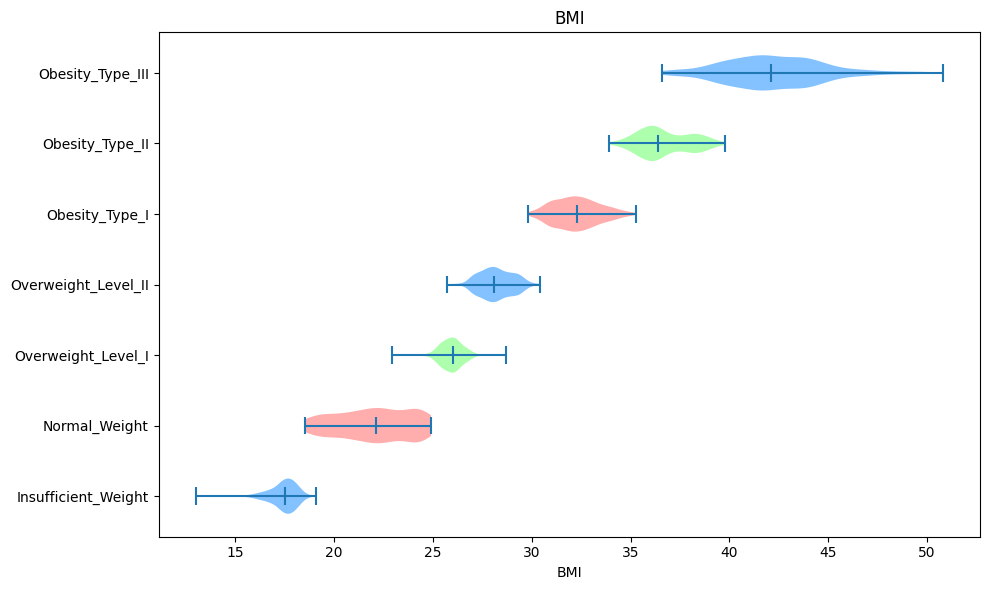

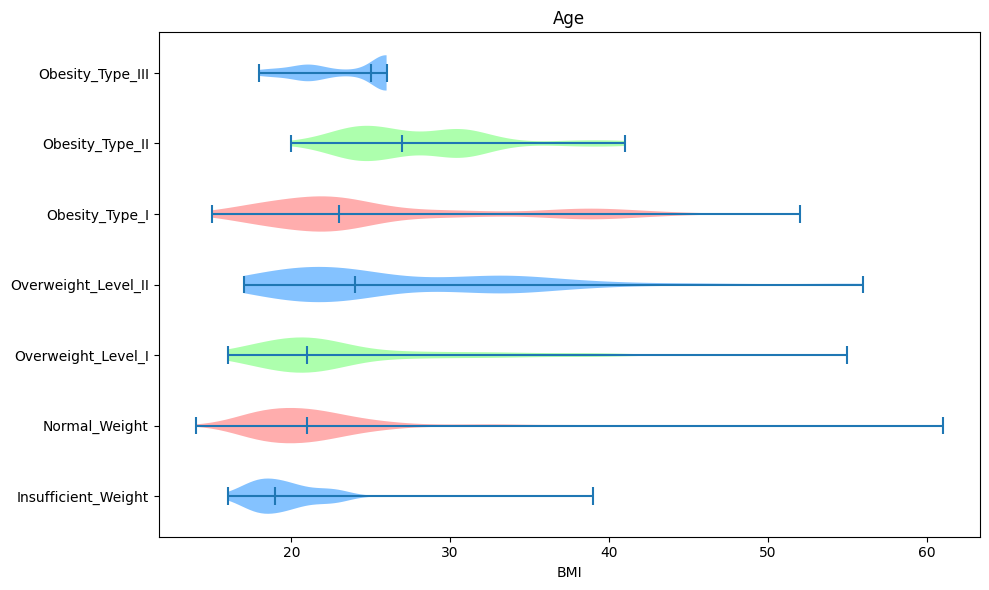

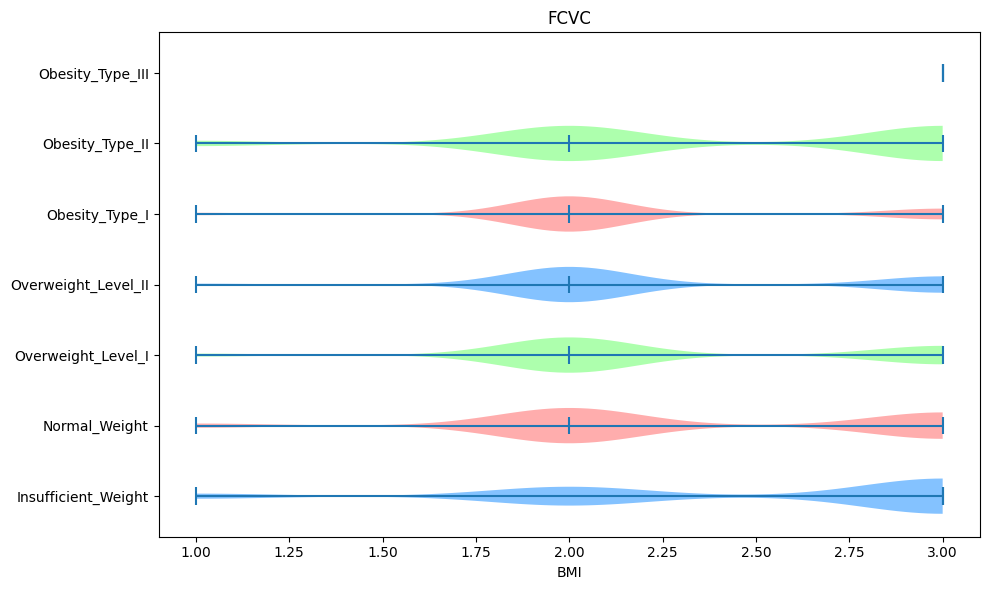

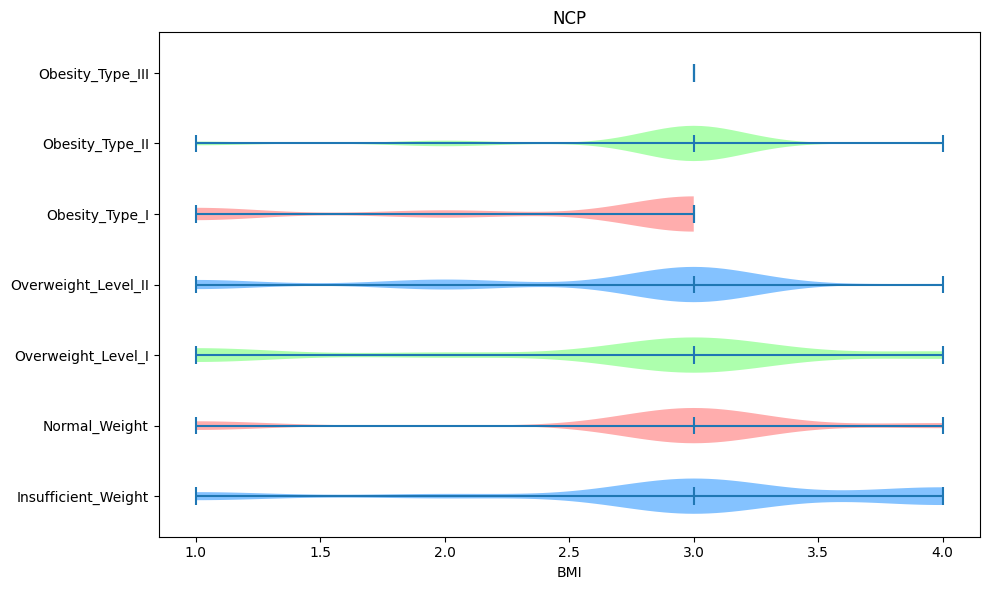

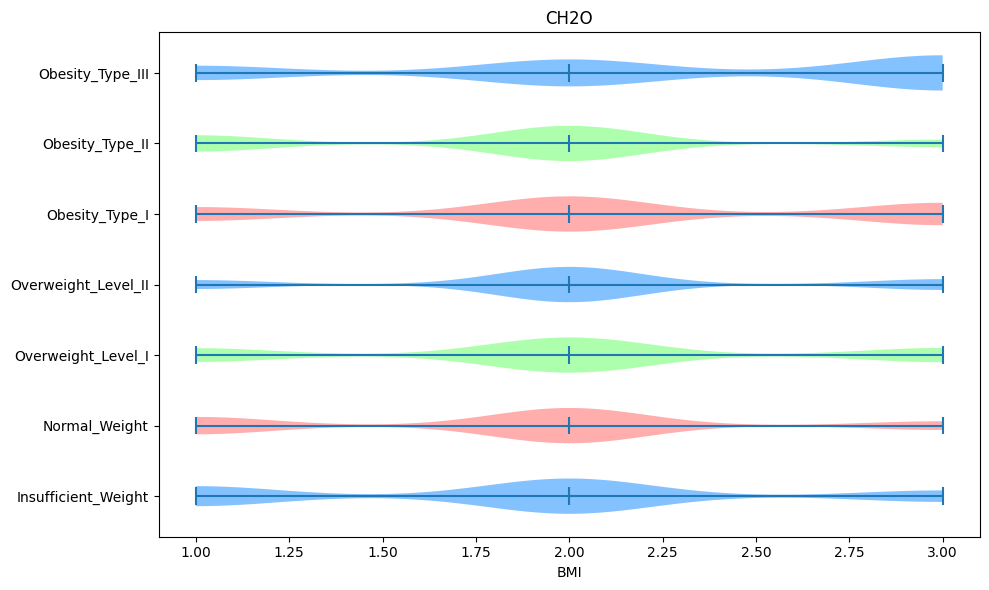

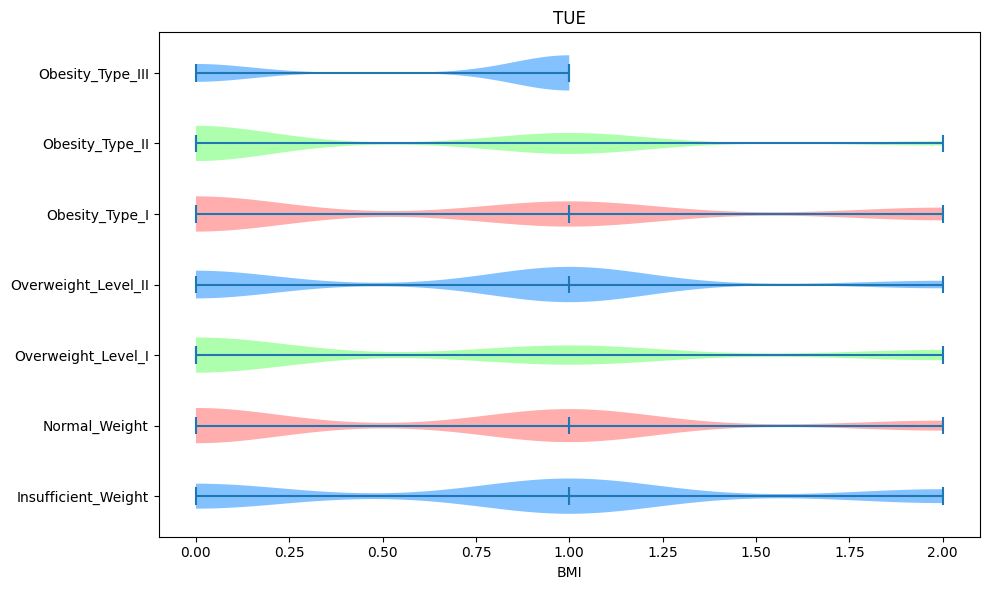

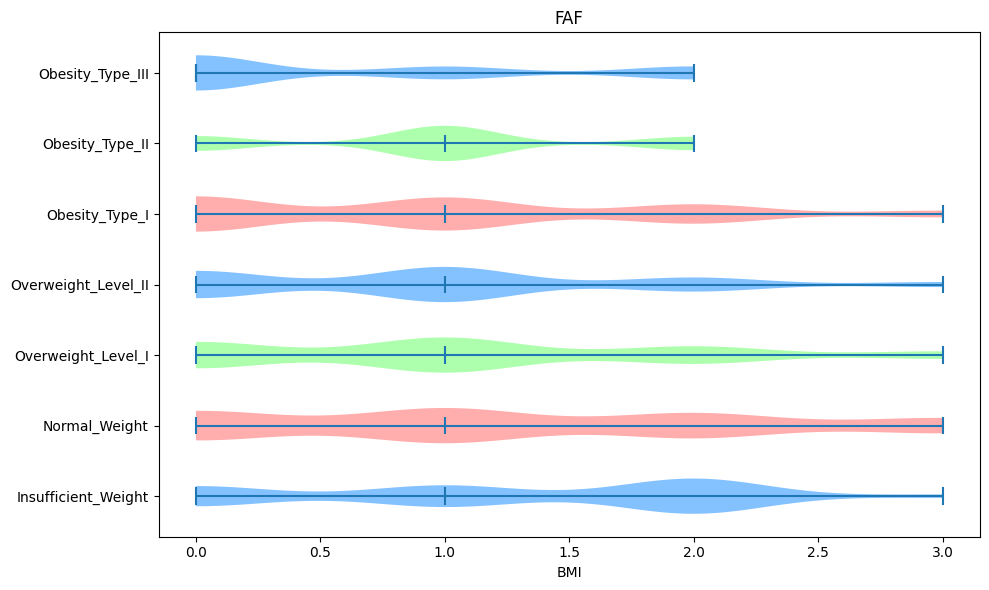

In [329]:
import matplotlib.pyplot as plt
import pandas as pd

def horizontalViolinPlot(column, colors=['#66b3ff', '#ff9999', '#99ff99']):

    # Create a figure and axes
    fig, ax = plt.subplots(figsize=(10, 6))

    # List of obesity levels to plot
    levels = ['Insufficient_Weight', 'Normal_Weight', 'Overweight_Level_I',
              'Overweight_Level_II', 'Obesity_Type_I', 'Obesity_Type_II',
              'Obesity_Type_III']

    # Create the violin plot data
    violin_data = [df[df['NObeyesdad'] == label][column] for label in levels]

    # Create the violin plot
    violin_parts = ax.violinplot(violin_data, vert=False, showmeans=False, showmedians=True)

    # Set colors for the violin parts if needed
    for i, pc in enumerate(violin_parts['bodies']):
        pc.set_facecolor(colors[i % len(colors)])  # Cycle through colors
        pc.set_alpha(0.8)  # Set transparency

    ax.set_title(column)
    ax.set_xlabel('BMI')  # Set the x-axis label
    ax.set_yticks(range(1, len(levels) + 1))
    ax.set_yticklabels(levels)  # Set y-axis ticks to the labels

    # Adjust layout
    plt.tight_layout()

    # Show the plot
    plt.show()
for col in ["BMI", "Age", "FCVC", "NCP", "CH2O", "TUE", "FAF"] :
    horizontalViolinPlot(col)




In [330]:
df.groupby('NObeyesdad')['BMI']

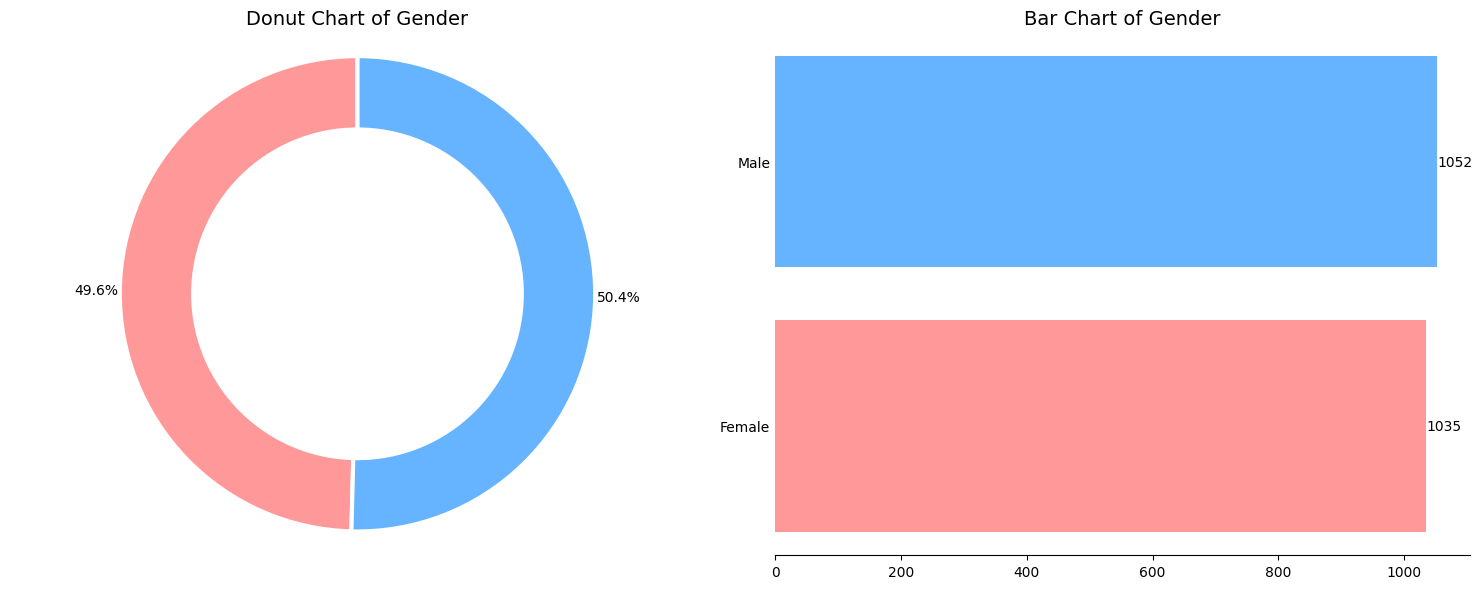

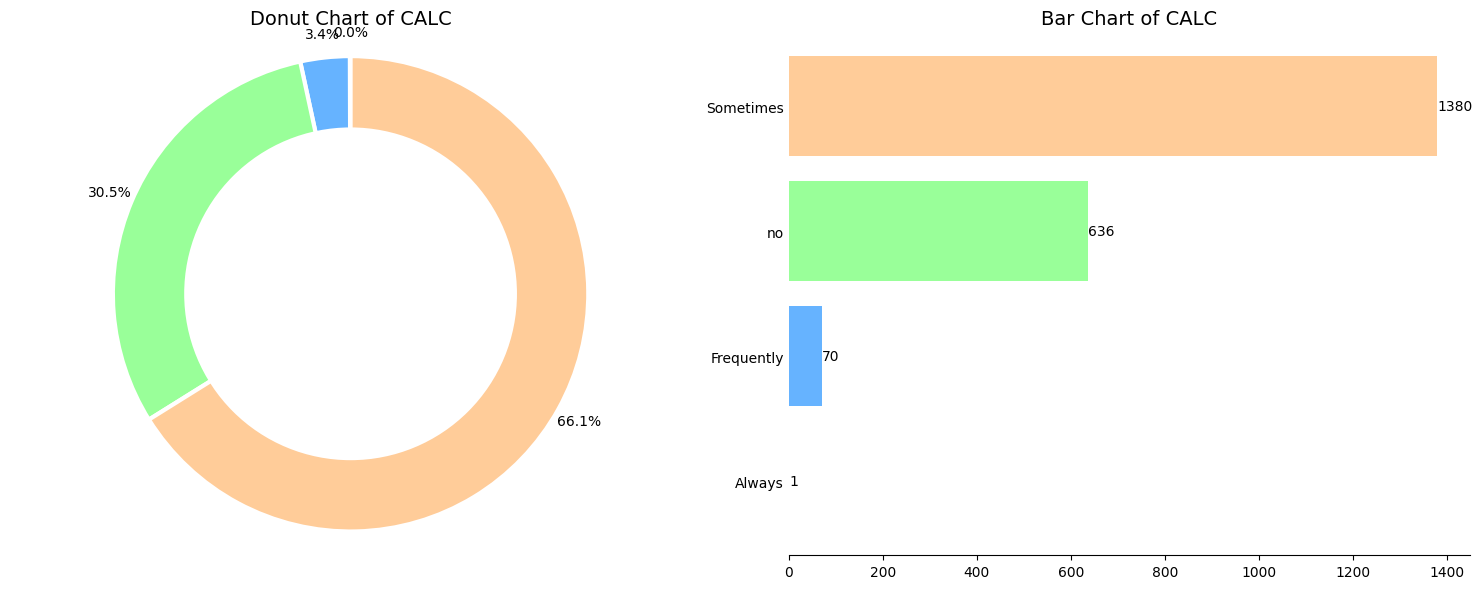

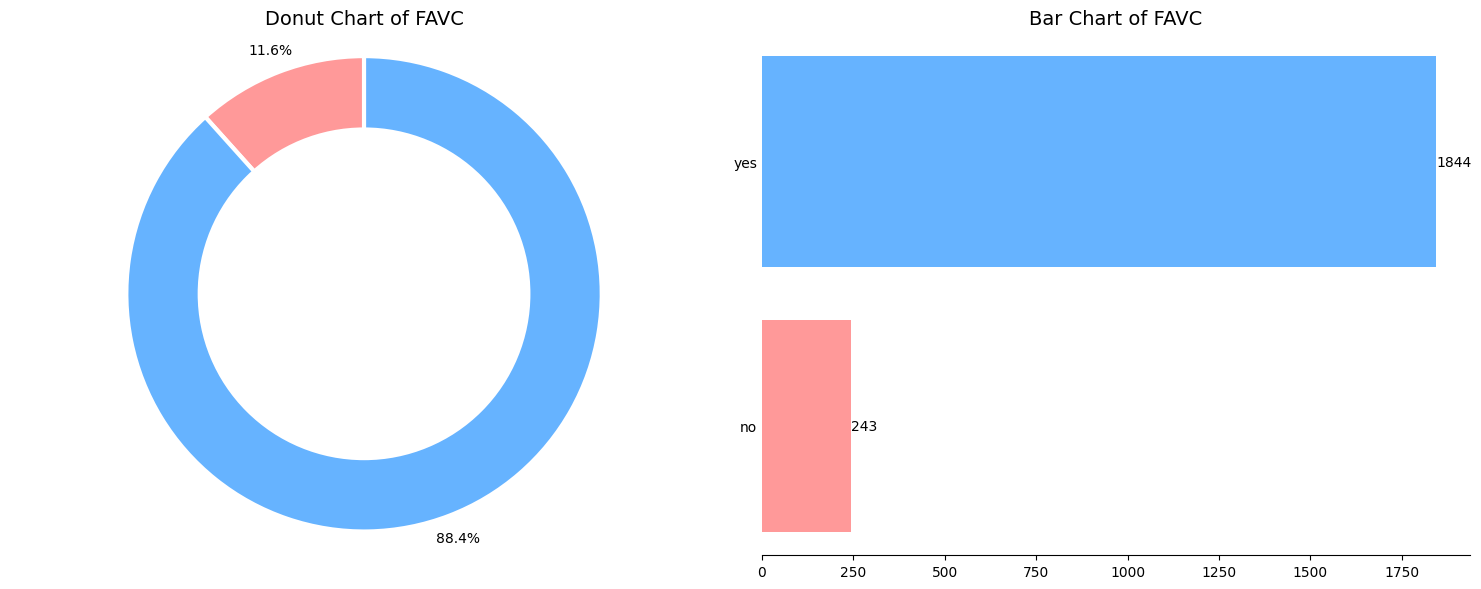

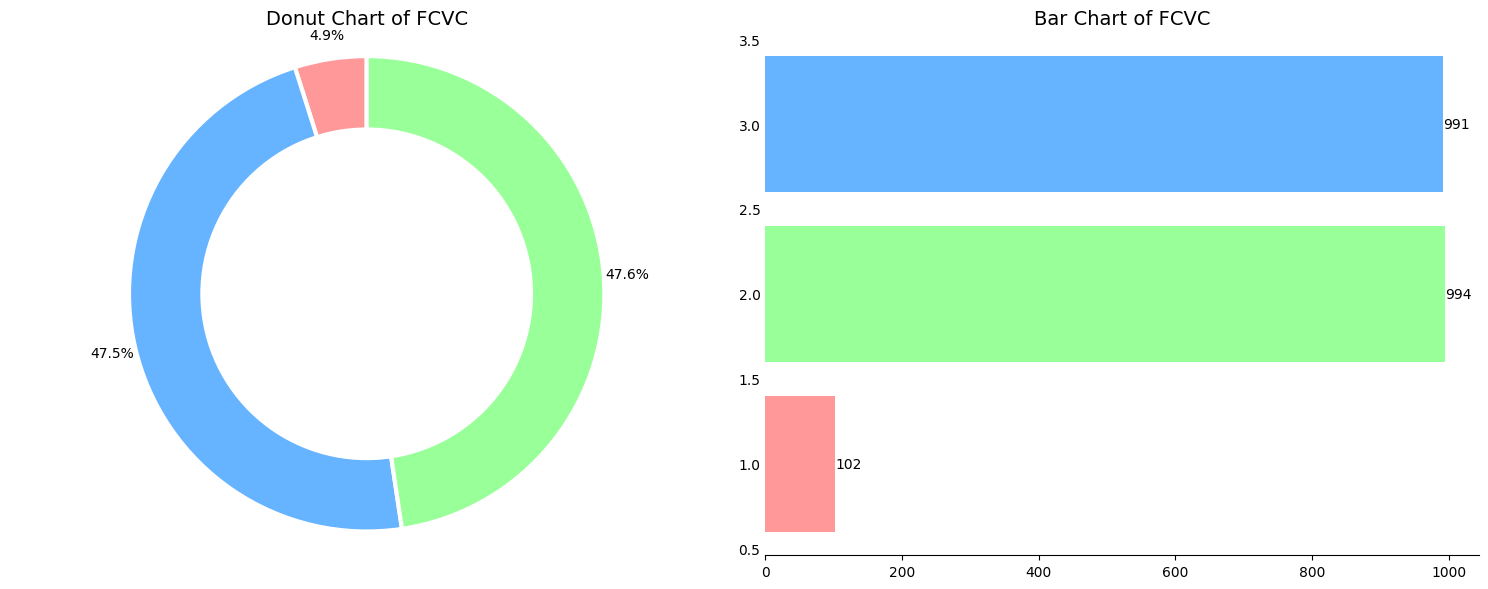

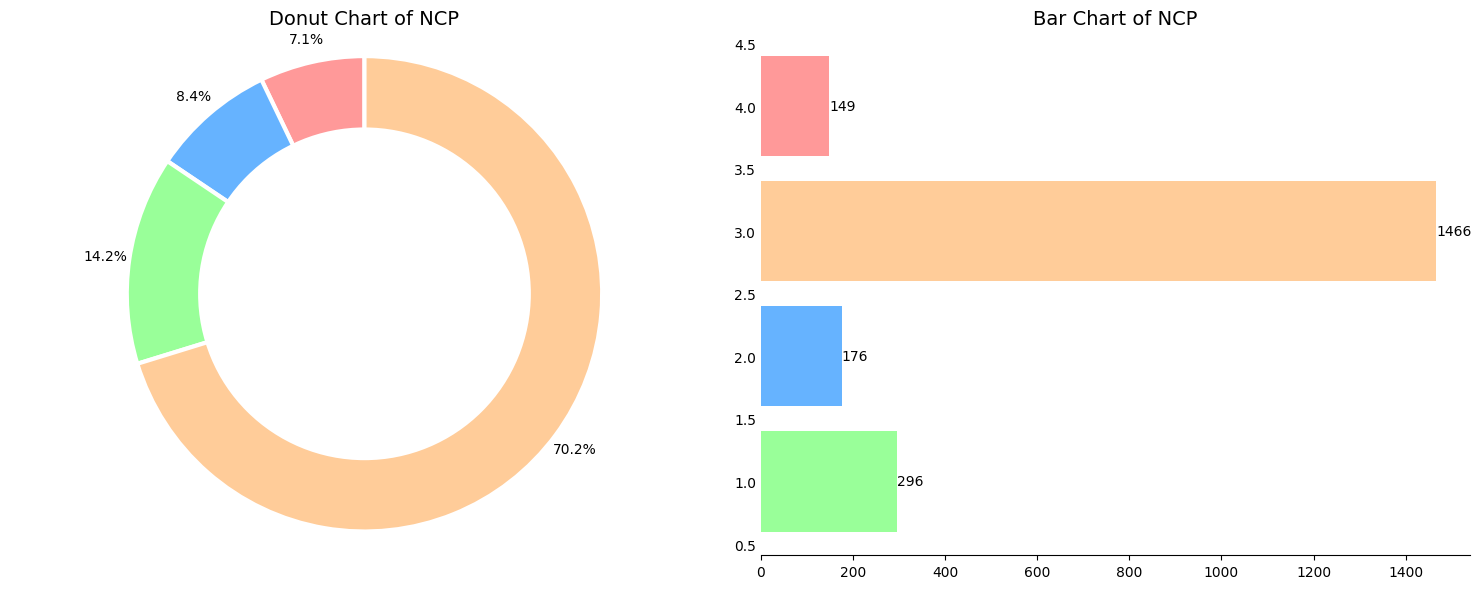

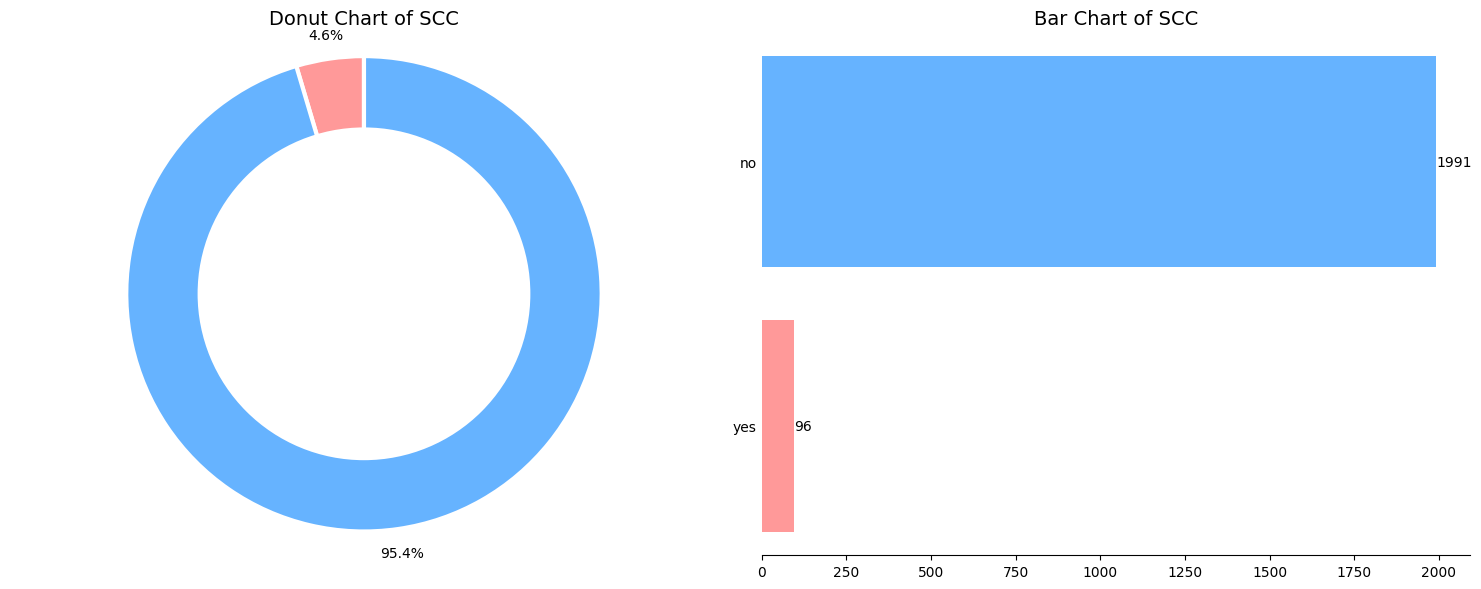

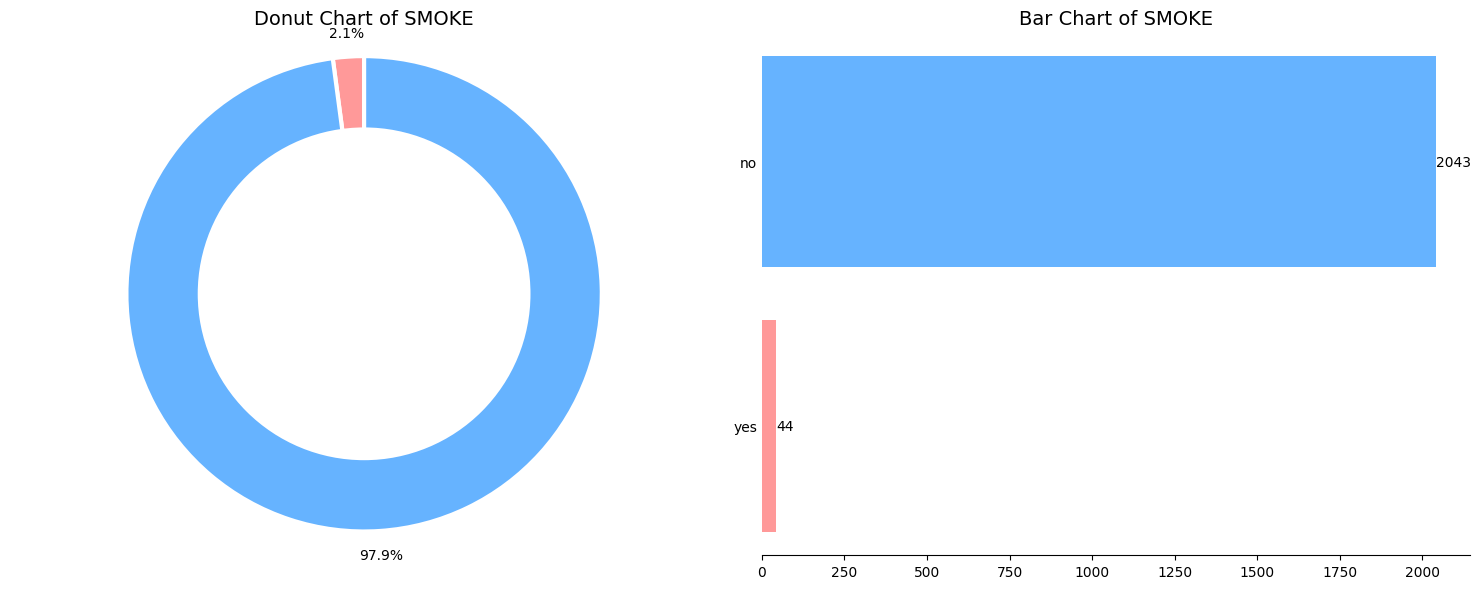

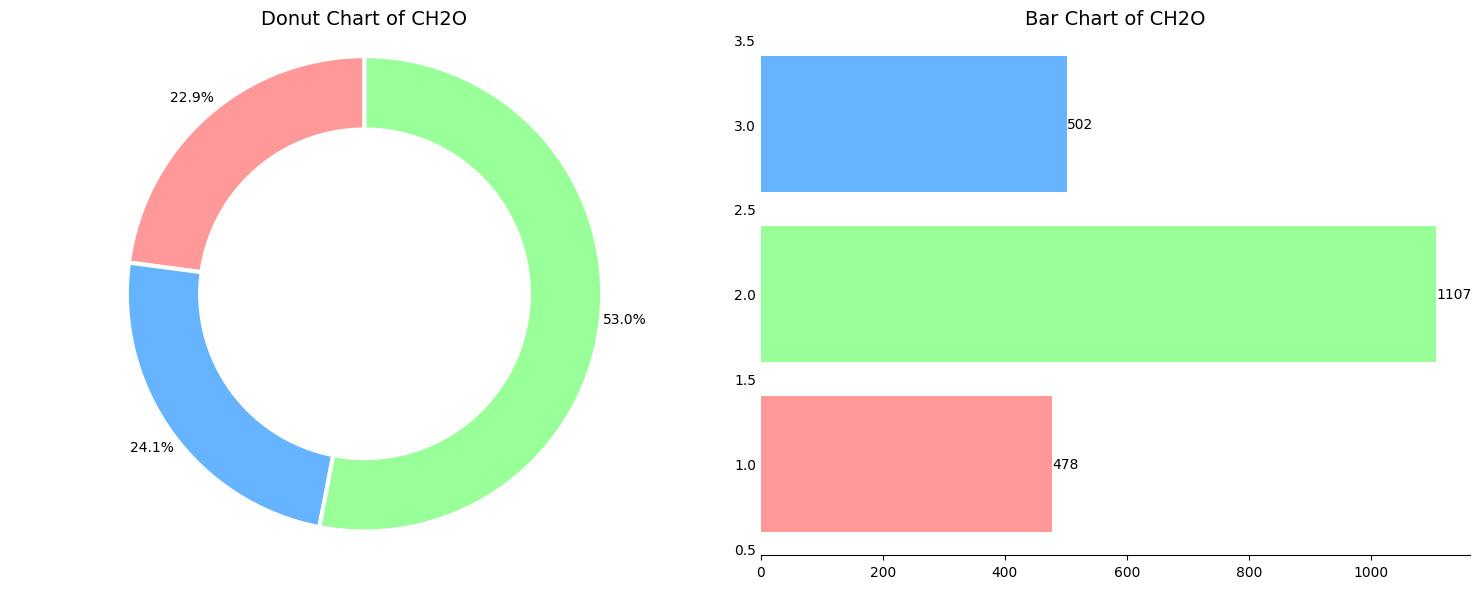

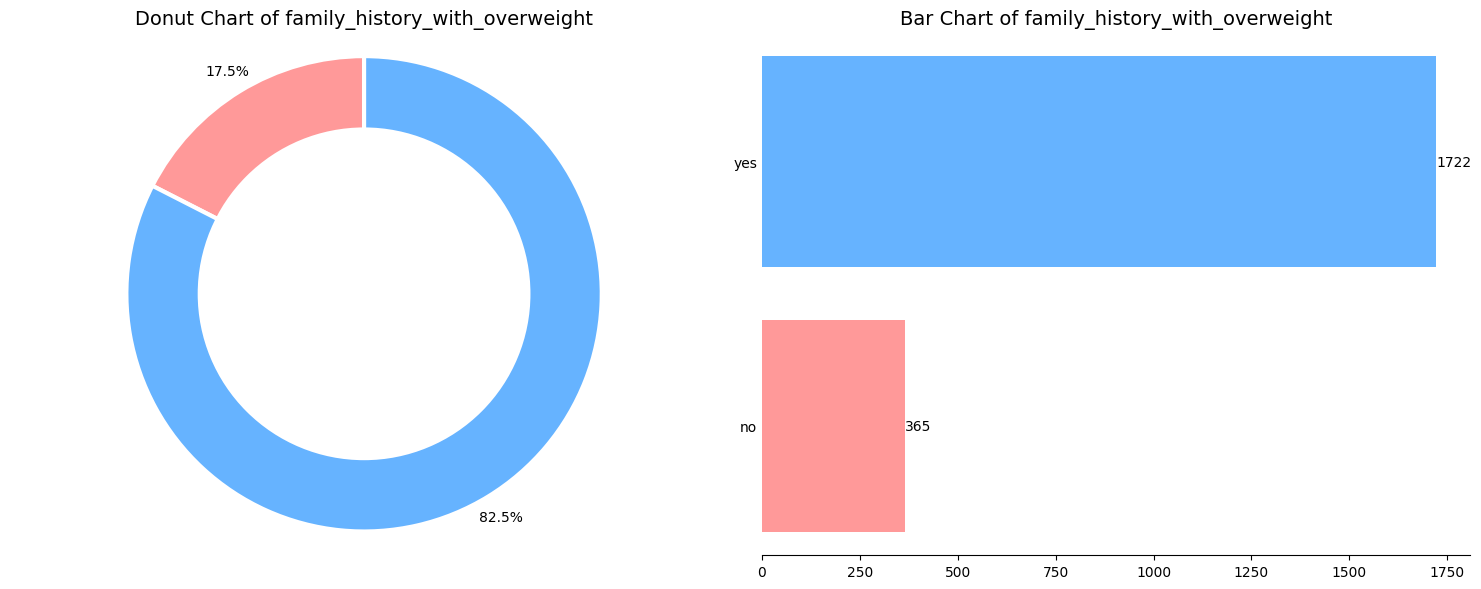

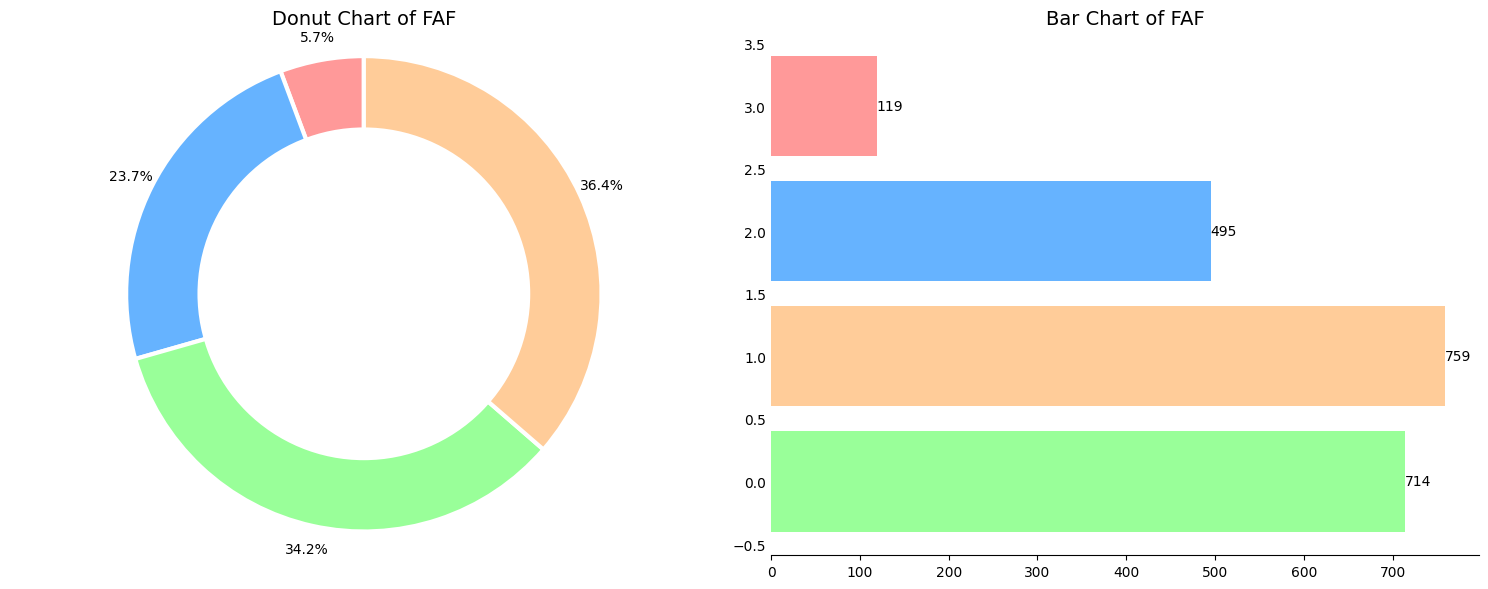

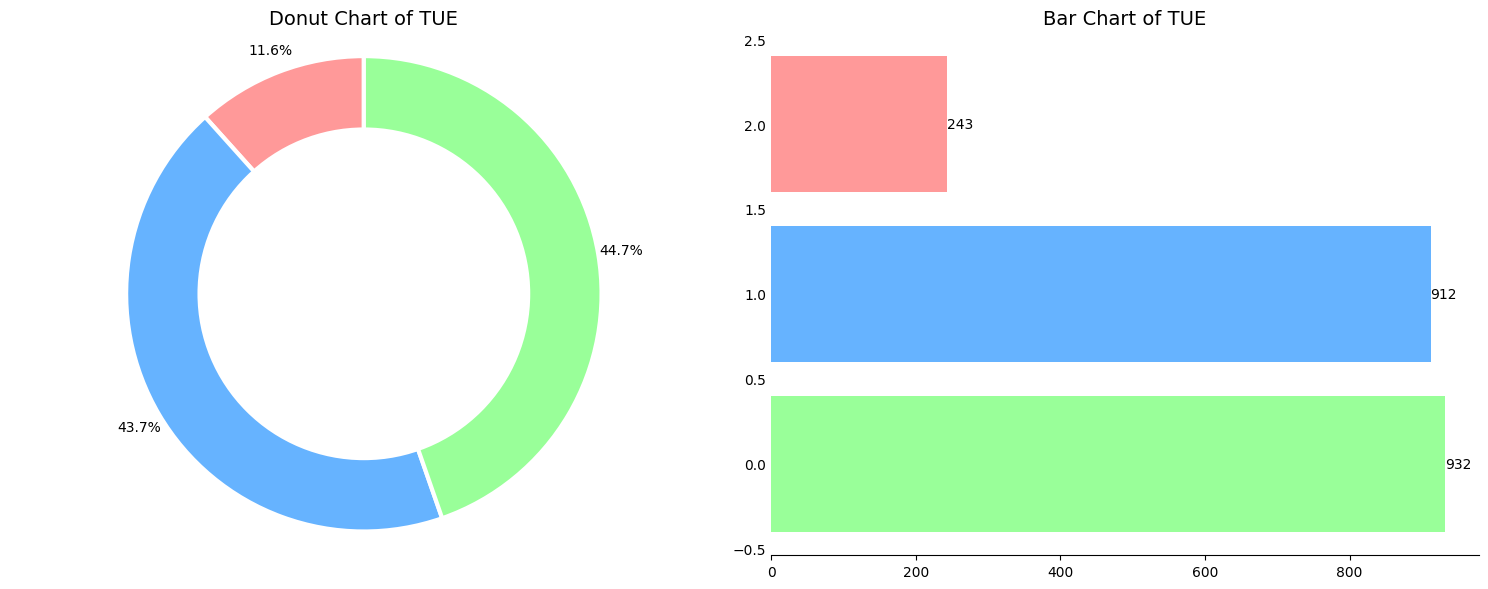

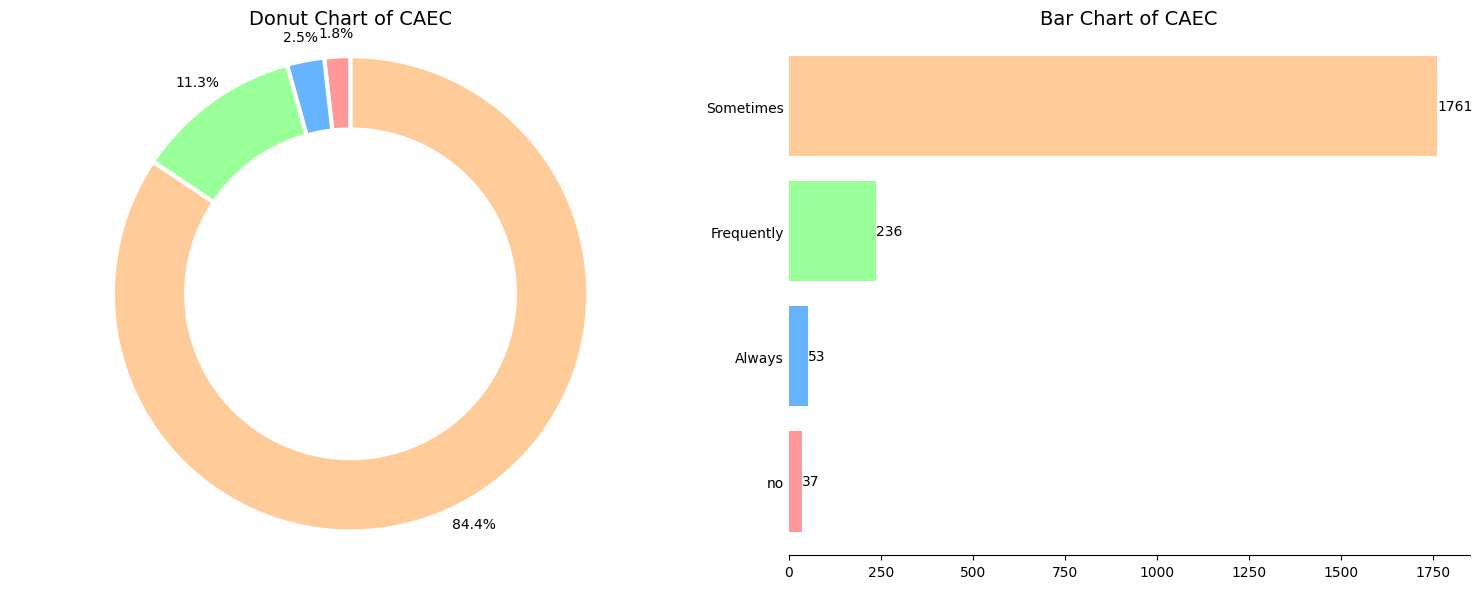

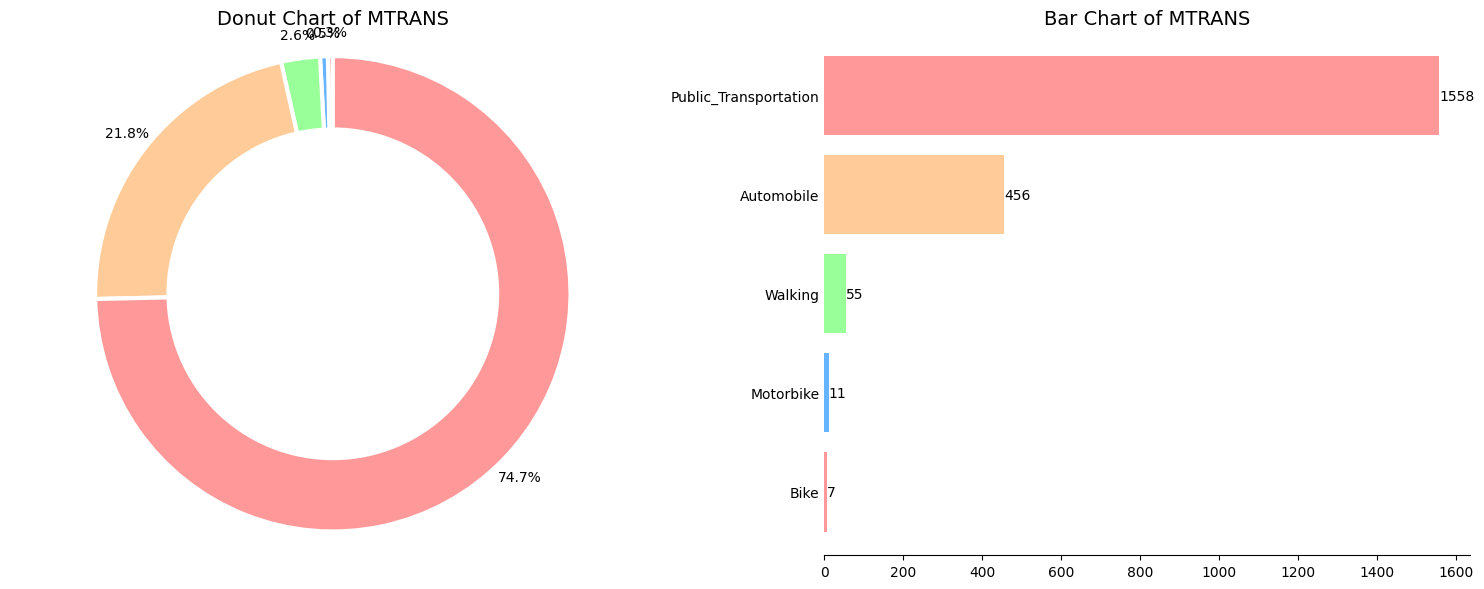

In [331]:
def plotChart(column, colors=['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']):
    global df  # Use the global df variable

    # Get value counts and sort labels by frequency (ascending)
    counts = df[column].value_counts().sort_values(ascending=True)

    # Create a consistent color mapping for each label
    color_mapping = {label: colors[i % len(colors)] for i, label in enumerate(counts.index)}

    # Create figure and axes for both charts
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

    # --- Donut Plot ---
    # Apply the sorted labels for the donut chart
    sorted_labels = counts.index
    sizes = counts.values

    # Apply the consistent color mapping to the donut chart
    chart_colors = [color_mapping[label] for label in sorted_labels]

    # Add gap between segments using 'wedgeprops'
    ax1.pie(sizes, colors=chart_colors, autopct='%1.1f%%', startangle=90, pctdistance=1.1,wedgeprops={'edgecolor': 'white', 'linewidth': 3})

    # Draw the inner white circle to make it a donut plot
    centre_circle = plt.Circle((0, 0), 0.70, fc='white')
    ax1.add_artist(centre_circle)

    # Equal aspect ratio ensures that pie is drawn as a circle
    ax1.axis('equal')
    ax1.set_title(f'Donut Chart of {column}', fontsize=14)

    # --- Horizontal Bar Chart ---
    # Apply the same sorted labels for the bar chart
    bars = ax2.barh(sorted_labels, sizes, color=[color_mapping[label] for label in sorted_labels], edgecolor='none')

    # Add counts on the bars
    for bar in bars:
        ax2.text(bar.get_width(), bar.get_y() + bar.get_height() / 2, str(int(bar.get_width())),va='center', ha='left', fontsize=10)

    # Hide spines
    ax2.spines['left'].set_visible(False)
    ax2.spines['right'].set_visible(False)
    ax2.spines['top'].set_visible(False)
    ax2.spines['bottom'].set_visible(True)

    # Hide x-axis ticks and labels
    ax2.tick_params(axis='y', which='both', length=0)  # Hide ticks but keep labels

    ax2.set_title(f'Bar Chart of {column}', fontsize=14)

    # Adjust layout
    plt.tight_layout()

    # Show the combined plot
    plt.show()

col = ['Gender', 'CALC', 'FAVC', 'FCVC', 'NCP','SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE','CAEC', 'MTRANS']

for c in col :
    plotChart(c)

In [332]:
df["SMOKE"].value_counts().index

Index(['no', 'yes'], dtype='object', name='SMOKE')

{'Male': [98, 145, 131, 187, 195, 295, 1], 'Female': [169, 137, 145, 103, 156, 2, 323]}


<ipython-input-333-0cde77c9f41c>:48: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


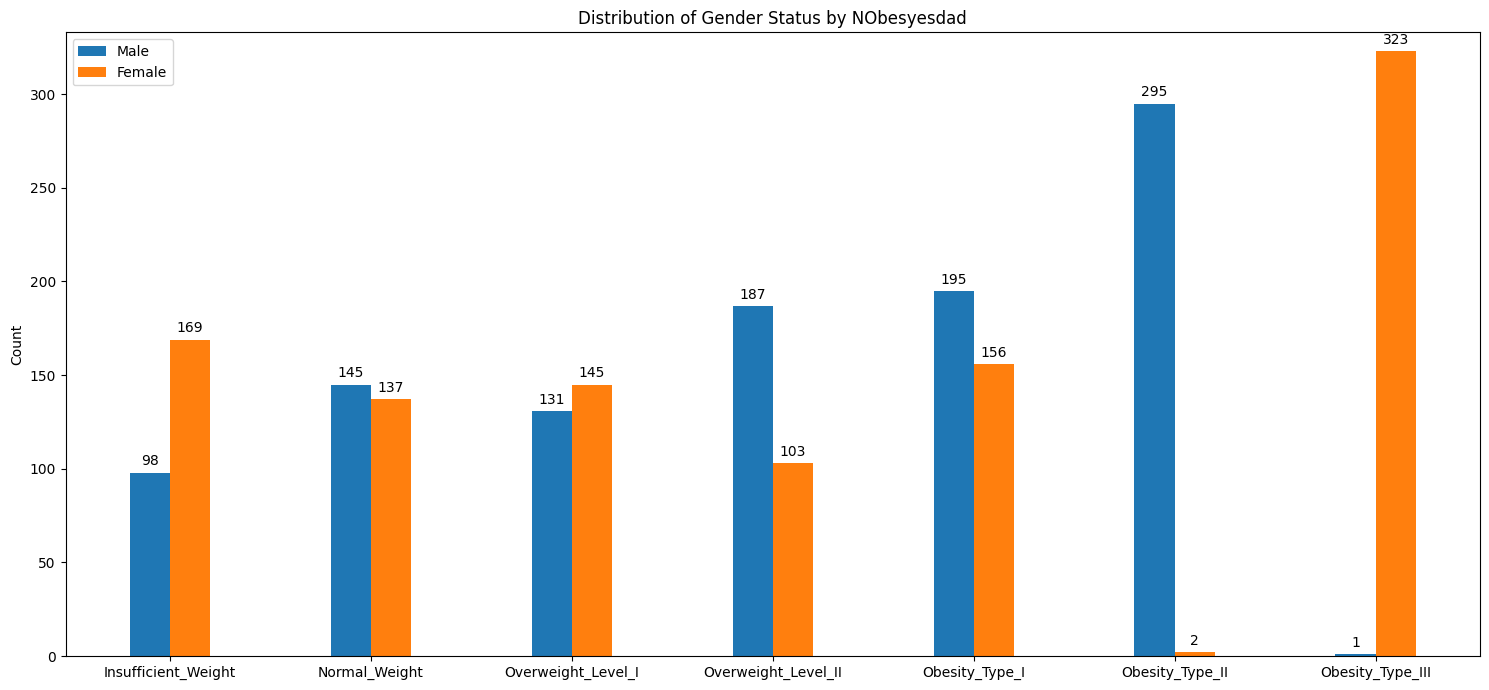

{'Sometimes': [149, 159, 210, 143, 172, 224, 323], 'no': [117, 104, 50, 128, 165, 71, 1], 'Frequently': [1, 18, 16, 19, 14, 2, 0], 'Always': [0, 1, 0, 0, 0, 0, 0]}


<ipython-input-333-0cde77c9f41c>:48: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


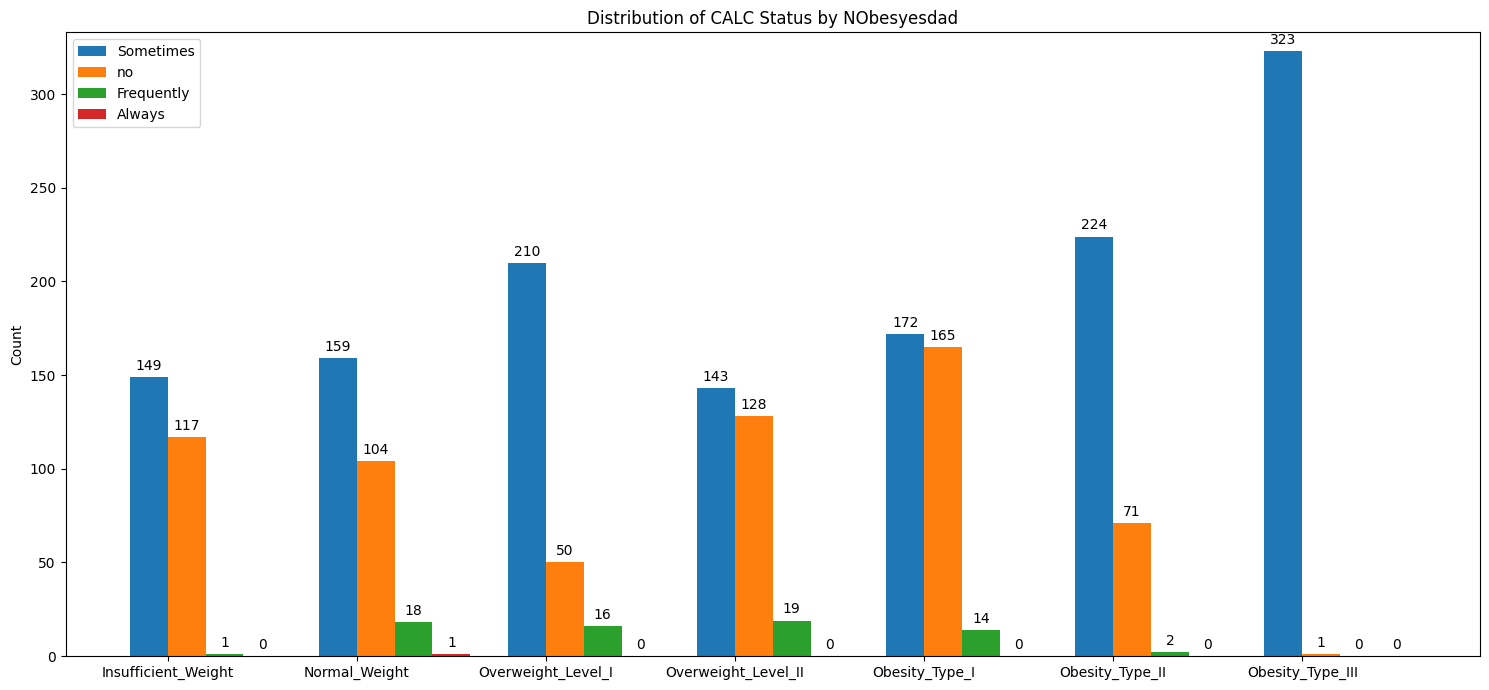

{'yes': [217, 204, 254, 216, 340, 290, 323], 'no': [50, 78, 22, 74, 11, 7, 1]}


<ipython-input-333-0cde77c9f41c>:48: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


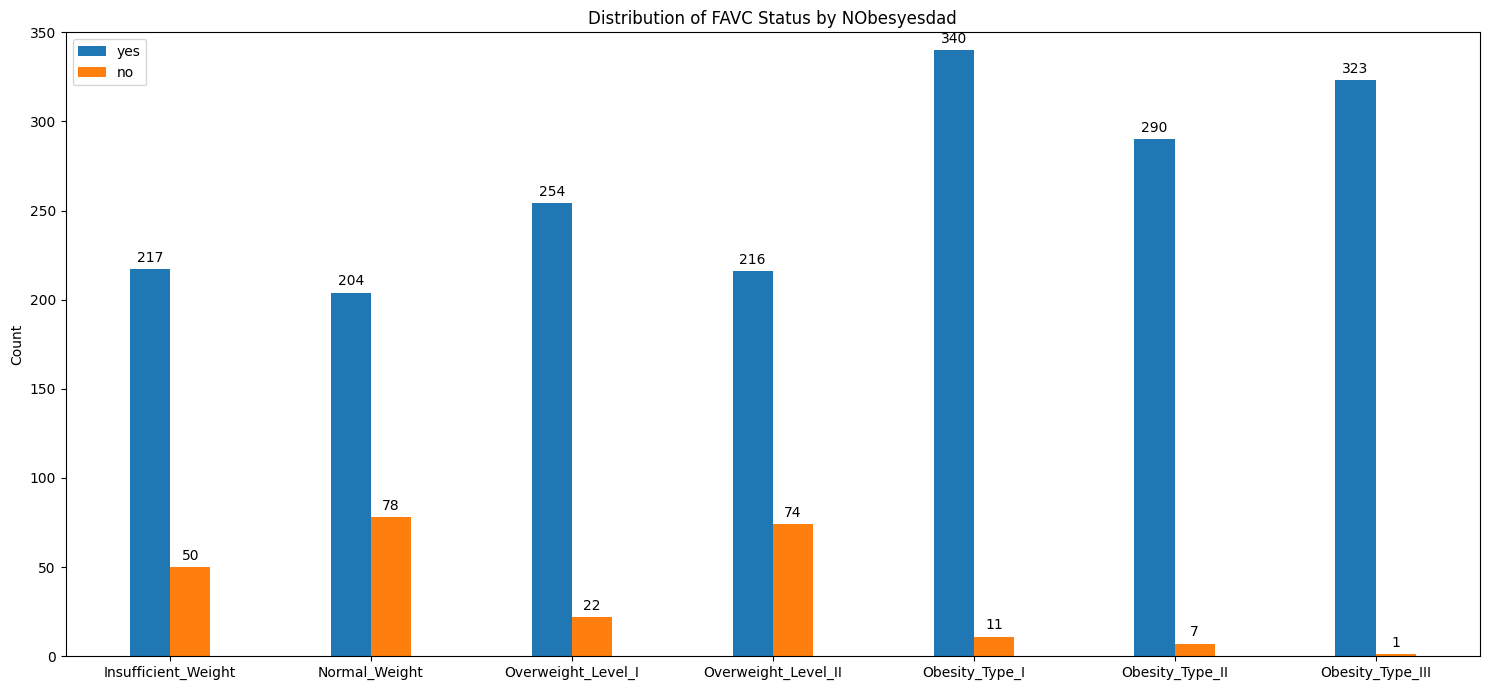

{2: [85, 151, 172, 192, 256, 138, 0], 3: [159, 113, 90, 89, 78, 138, 324], 1: [23, 18, 14, 9, 17, 21, 0]}


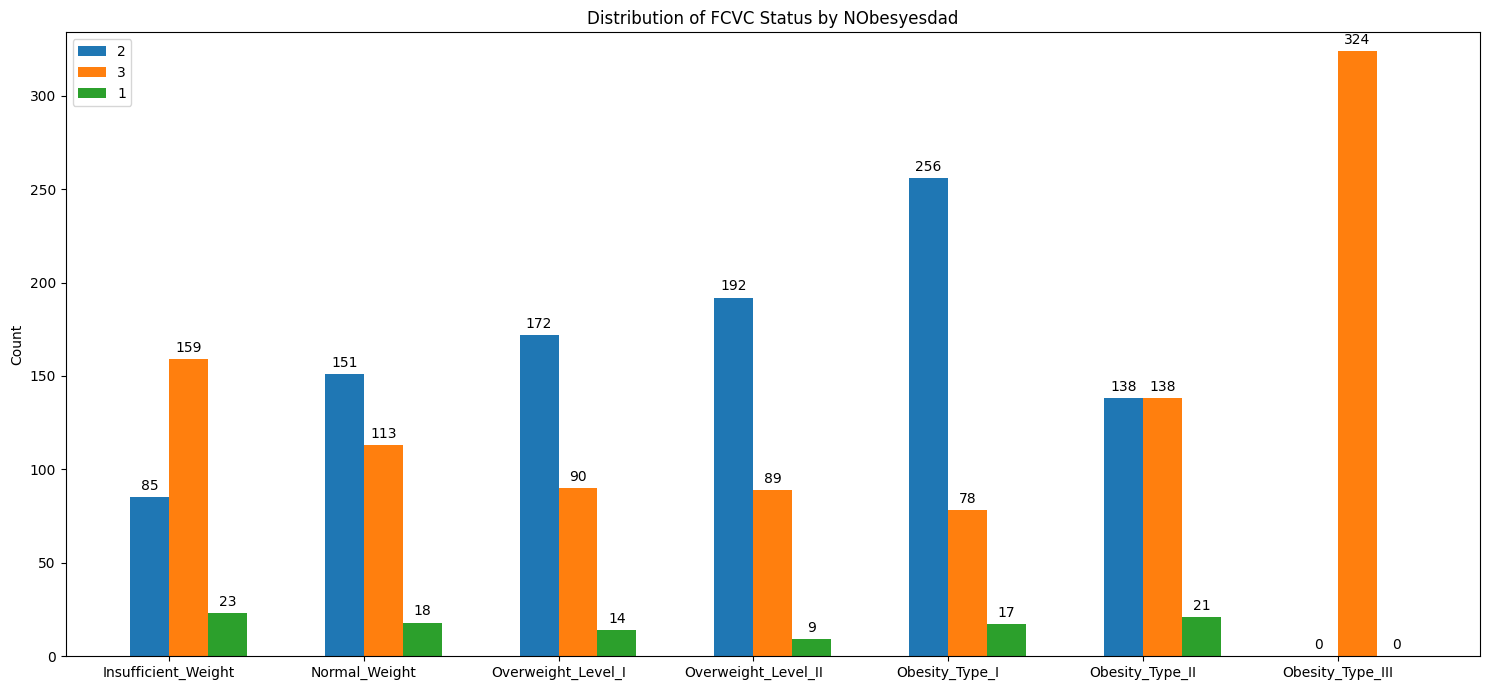

{3: [144, 203, 158, 184, 225, 228, 324], 1: [33, 50, 62, 48, 79, 24, 0], 2: [18, 0, 23, 52, 47, 36, 0], 4: [72, 29, 33, 6, 0, 9, 0]}


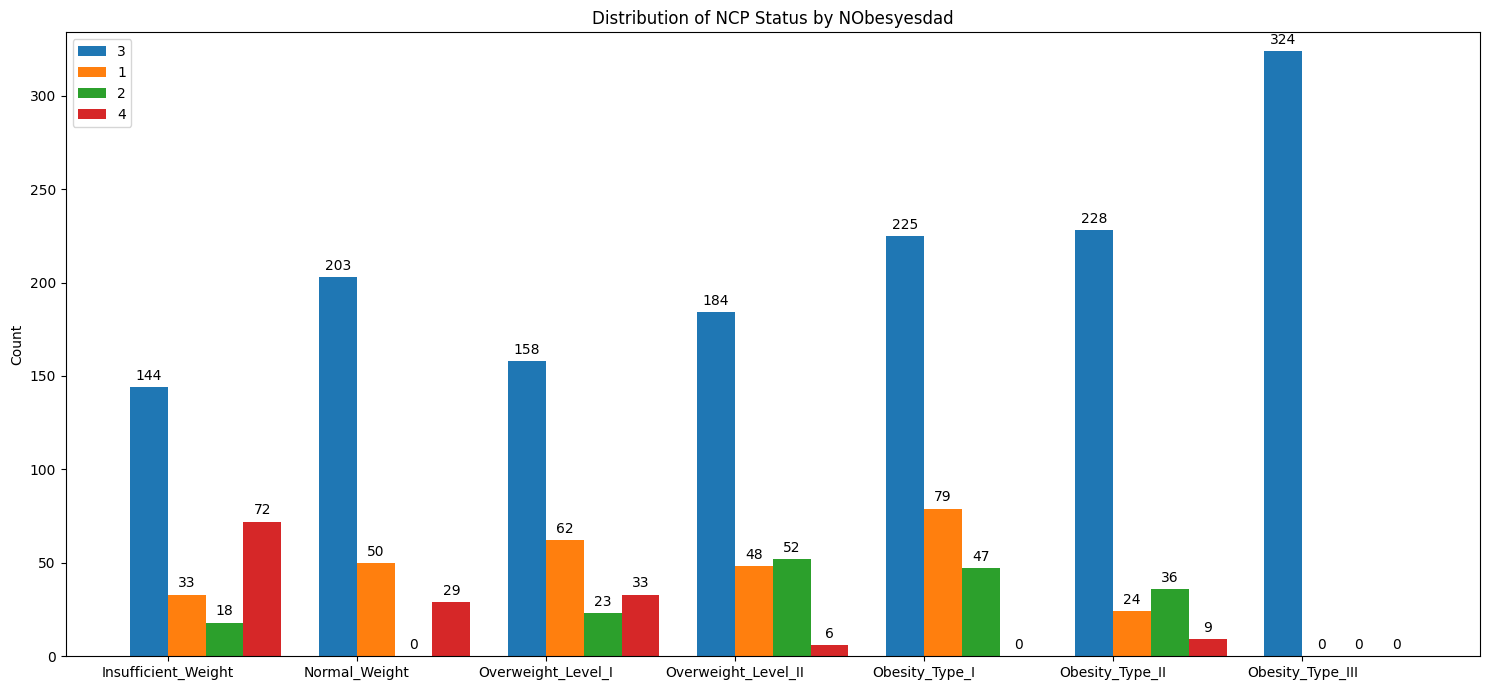

{'no': [245, 252, 239, 286, 349, 296, 324], 'yes': [22, 30, 37, 4, 2, 1, 0]}


<ipython-input-333-0cde77c9f41c>:48: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


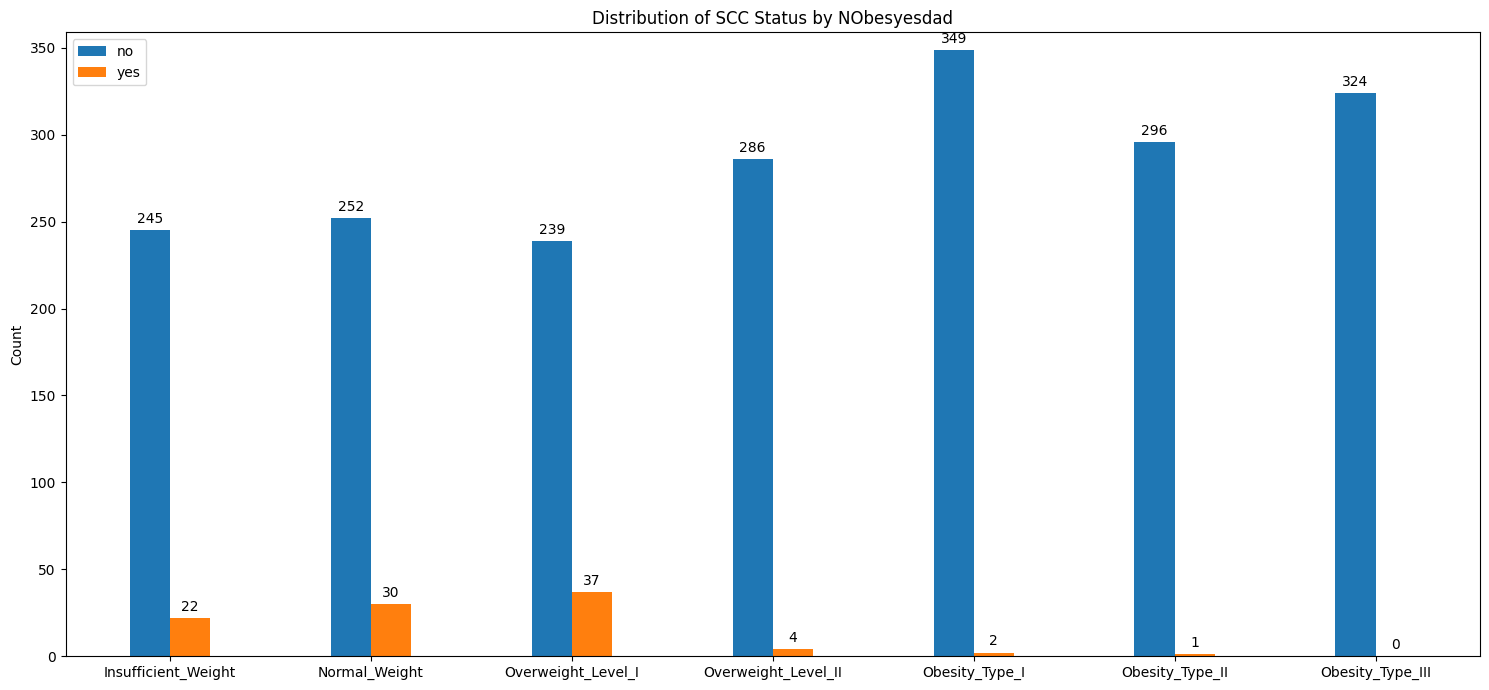

{'no': [266, 269, 273, 285, 345, 282, 323], 'yes': [1, 13, 3, 5, 6, 15, 1]}


<ipython-input-333-0cde77c9f41c>:48: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


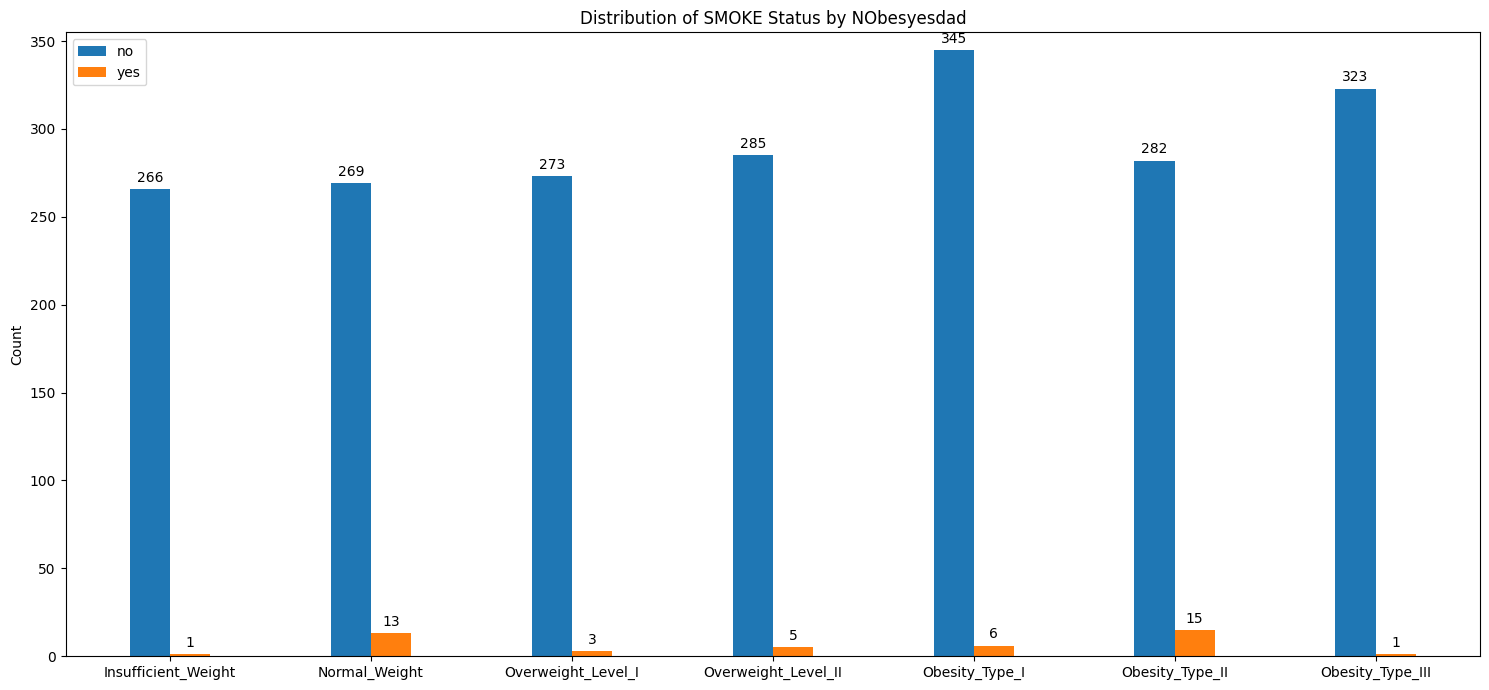

{2: [141, 162, 154, 186, 173, 177, 114], 3: [46, 40, 62, 57, 110, 38, 149], 1: [80, 80, 60, 47, 68, 82, 61]}


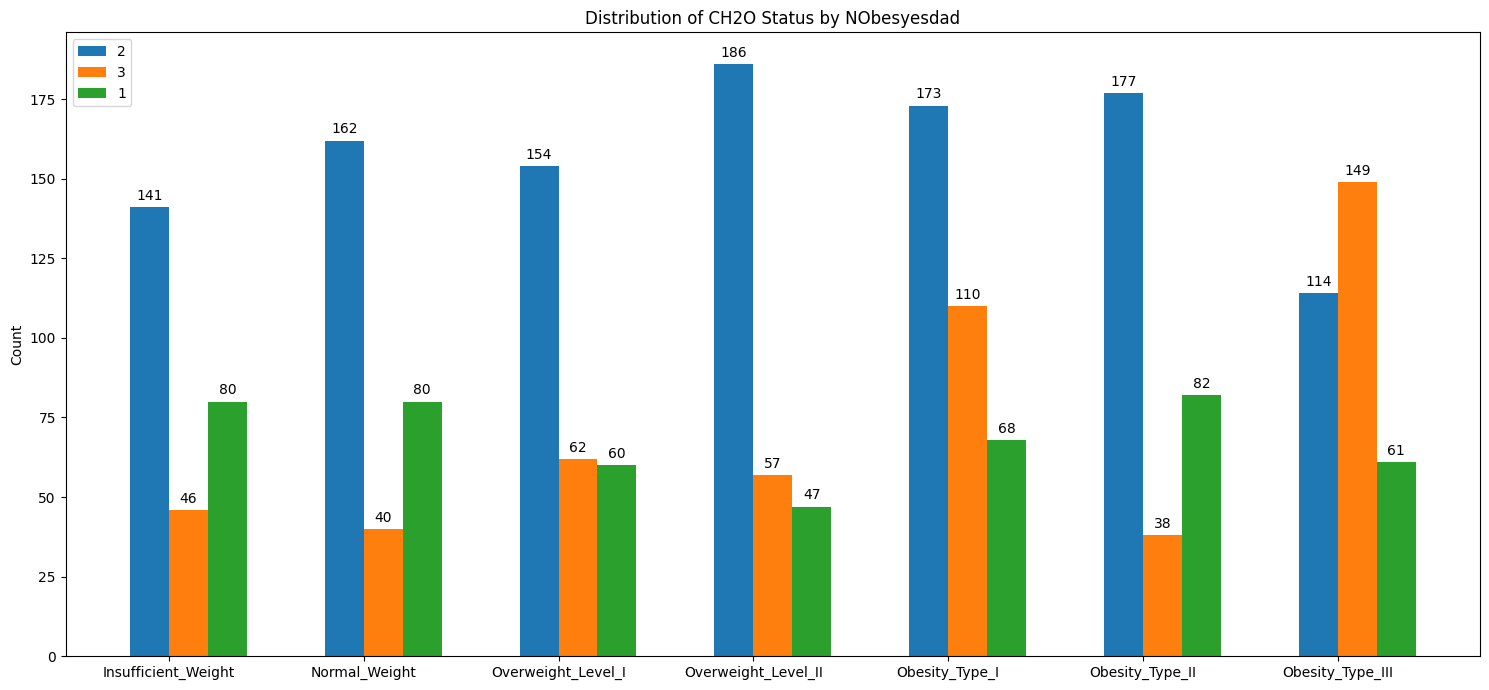

{'yes': [125, 152, 209, 272, 344, 296, 324], 'no': [142, 130, 67, 18, 7, 1, 0]}


<ipython-input-333-0cde77c9f41c>:48: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


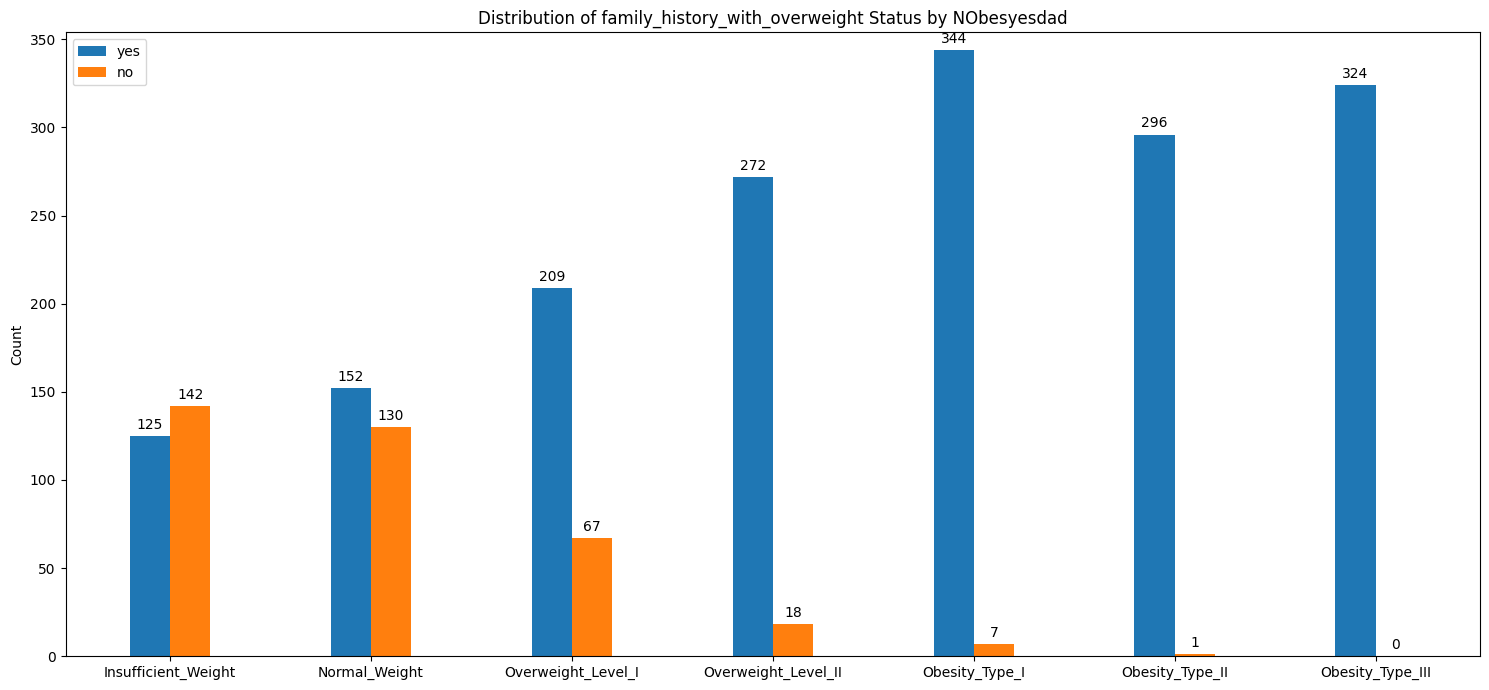

{1: [72, 94, 112, 125, 123, 165, 68], 0: [67, 79, 84, 97, 131, 69, 187], 2: [117, 68, 56, 50, 72, 63, 69], 3: [11, 41, 24, 18, 25, 0, 0]}


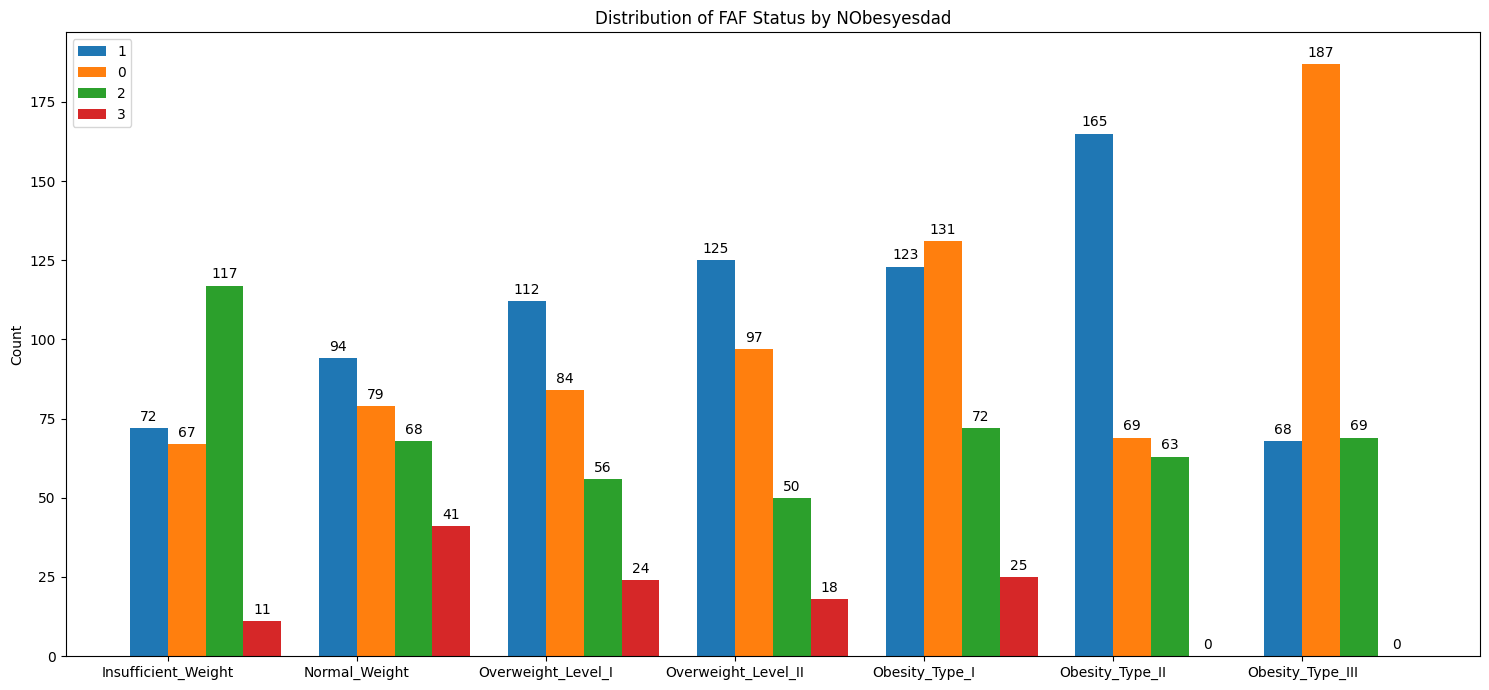

{0: [90, 127, 150, 114, 169, 173, 109], 1: [127, 119, 82, 145, 121, 103, 215], 2: [50, 36, 44, 31, 61, 21, 0]}


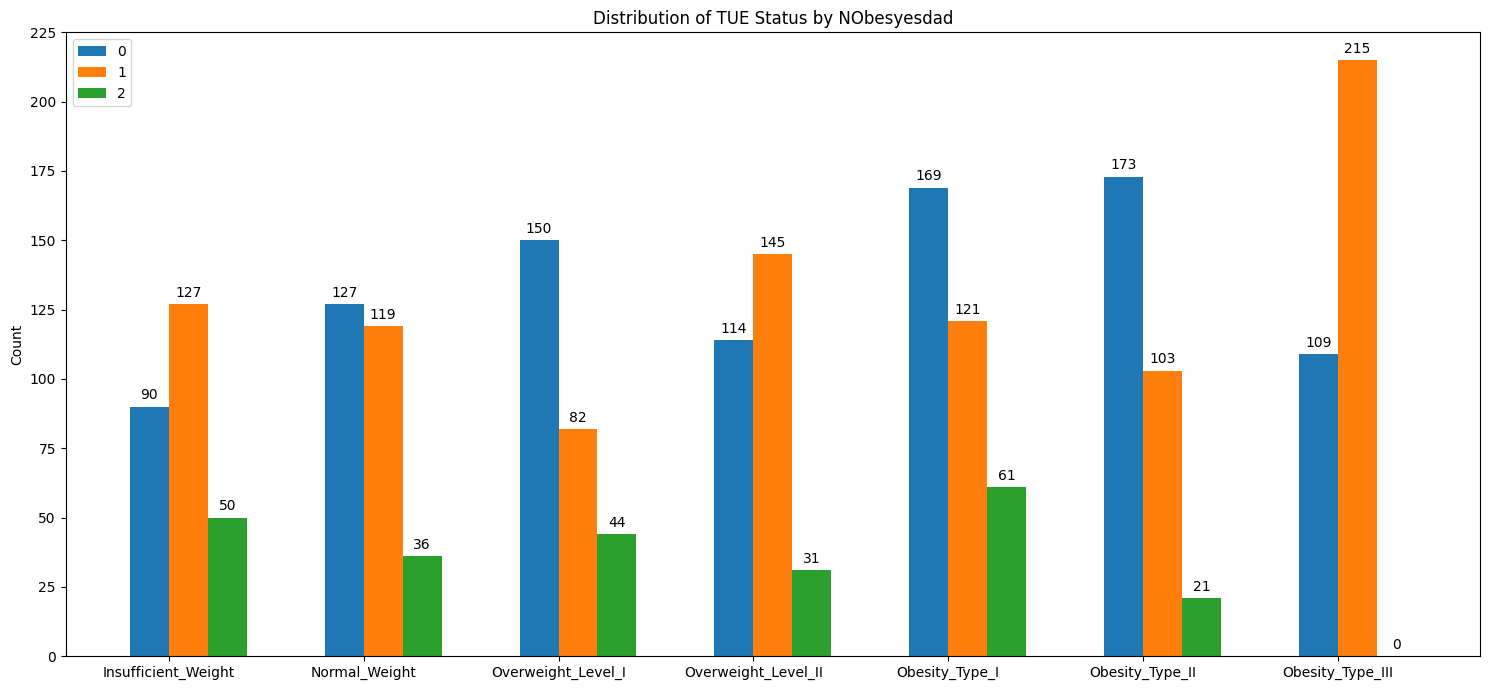

{'Sometimes': [145, 156, 236, 270, 338, 293, 323], 'Frequently': [117, 81, 14, 16, 6, 1, 1], 'Always': [2, 35, 5, 3, 6, 2, 0], 'no': [3, 10, 21, 1, 1, 1, 0]}


<ipython-input-333-0cde77c9f41c>:48: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


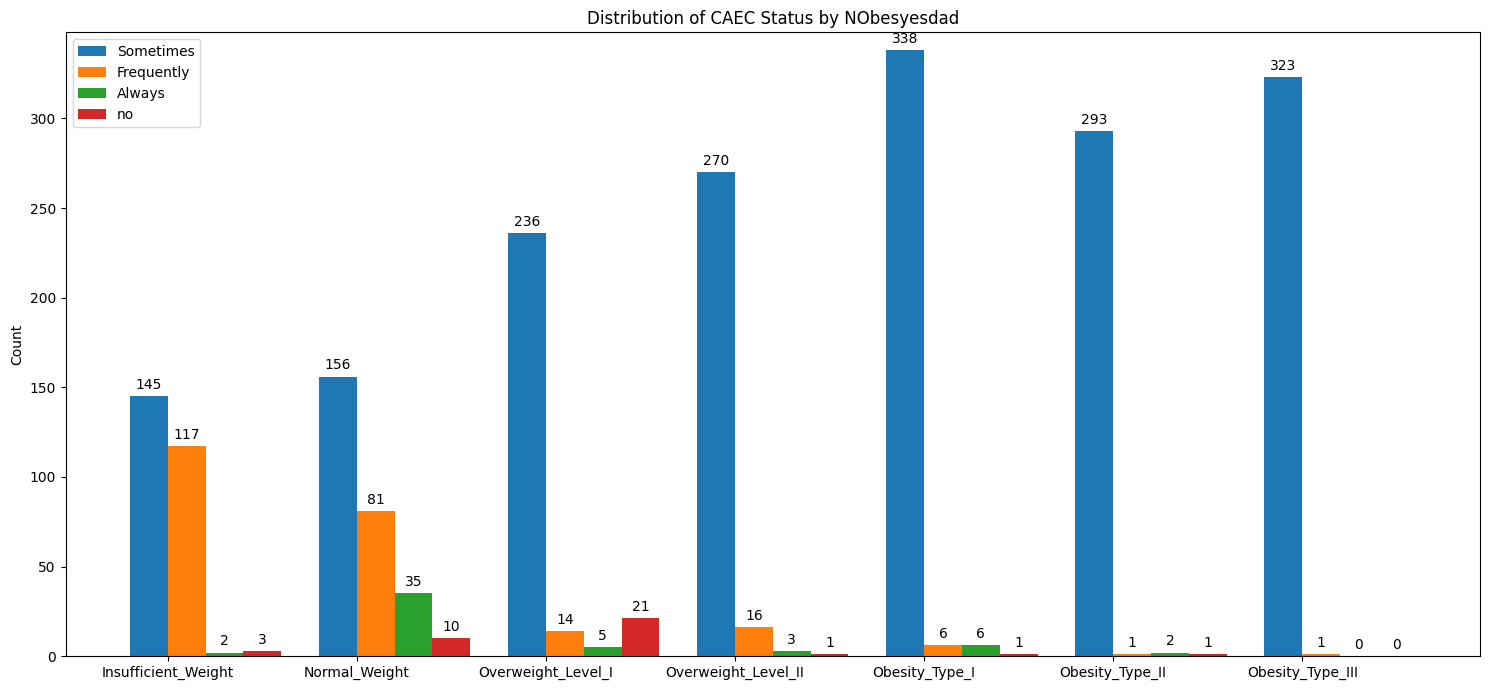

{'Public_Transportation': [215, 197, 198, 189, 236, 200, 323], 'Automobile': [46, 44, 66, 94, 110, 95, 1], 'Walking': [6, 31, 9, 6, 2, 1, 0], 'Motorbike': [0, 6, 1, 1, 3, 0, 0], 'Bike': [0, 4, 2, 0, 0, 1, 0]}


<ipython-input-333-0cde77c9f41c>:48: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


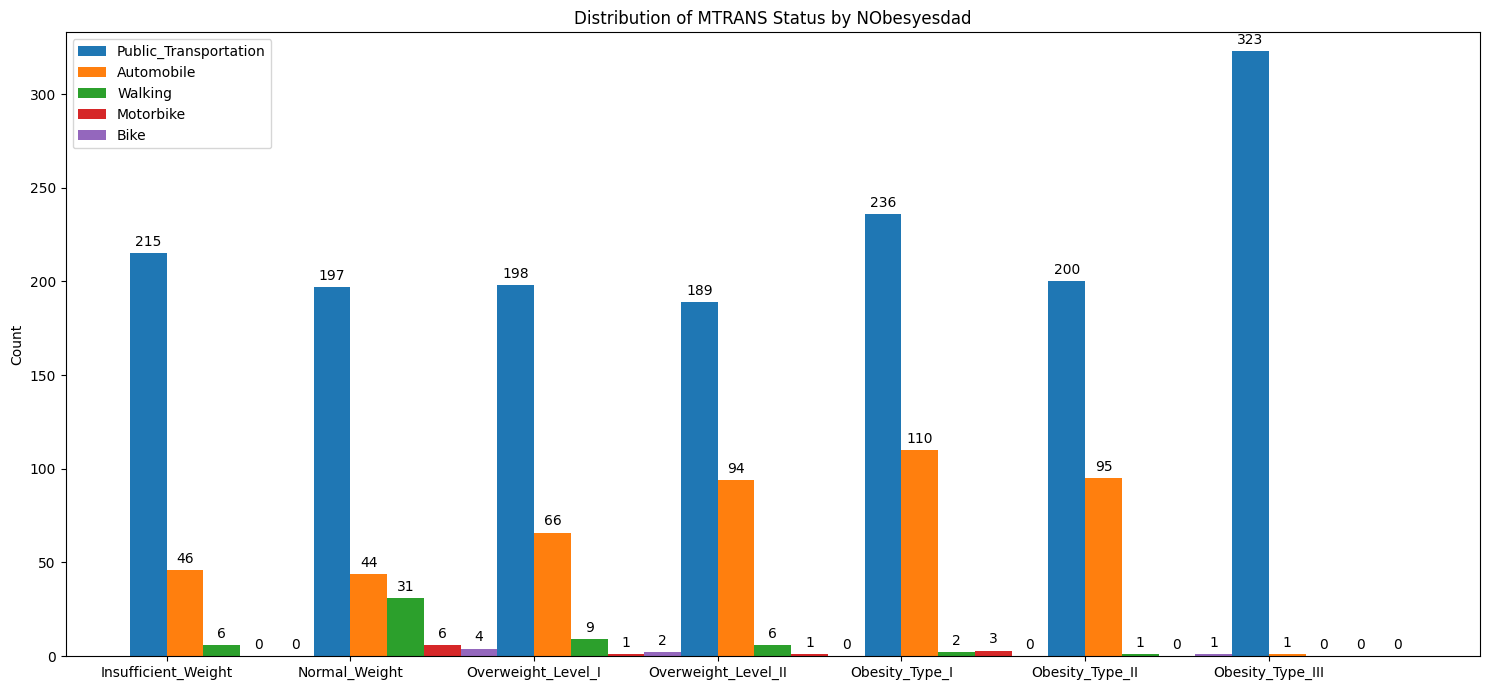

In [333]:
def showgraph(column):
    labels = [
        'Insufficient_Weight', 'Normal_Weight',
        'Overweight_Level_I', 'Overweight_Level_II',
        'Obesity_Type_I', 'Obesity_Type_II', 'Obesity_Type_III'
    ]

    # Get unique values from the SMOKE column
    smoke_status = df[column].value_counts().index.tolist()

    # Initialize the values dictionary
    values = {status: [] for status in smoke_status}

    # Count occurrences for each weight category
    for level in labels:
        counts = df[df["NObeyesdad"] == level][column].value_counts()
        for status in smoke_status:
            values[status].append(counts.get(status, 0))

    # Prepare data for plotting
    x = np.arange(len(labels))  # the label locations
    width = 0.20  # the width of the bars

    fig, ax = plt.subplots(figsize=(15, 7), layout='constrained')


    # Create bars for each smoke status
    for i, status in enumerate(smoke_status):
        rects = ax.bar(x + (i - 0.5) * width, values[status], width, label=status)
        ax.bar_label(rects, padding=3)

    # Add labels, title, and custom x-axis tick labels
    ax.set_ylabel('Count')
    ax.set_title(f'Distribution of {column} Status by NObesyesdad')
    ax.set_xticks(x)
    ax.set_xticklabels(labels)
    ax.legend(loc='upper left', ncols=1)
    ax.set_ylim(0, max(max(counts) for counts in values.values()) + 10)  # Dynamic y-limit

    # Adjust layout
    plt.tight_layout()
    plt.show()

col = ['Gender', 'CALC', 'FAVC', 'FCVC', 'NCP','SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE','CAEC', 'MTRANS']
# col = ['CALC','FCVC', 'NCP']
# Example usage
for c in col:
  showgraph(c)


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


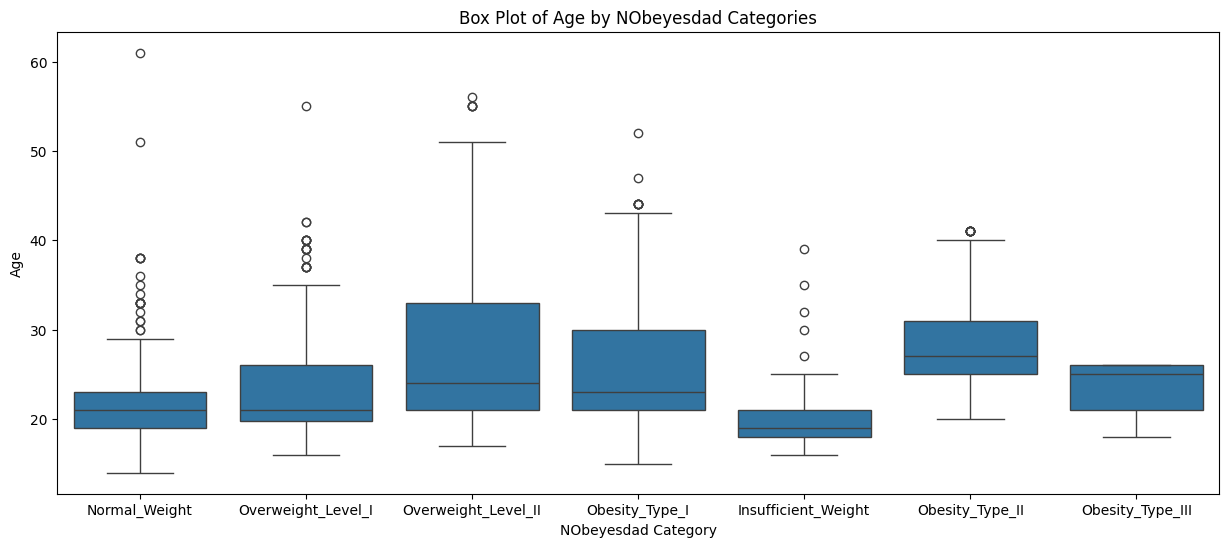

In [334]:
# Example DataFrame creation (replace this with your actual DataFrame)
# df = pd.read_csv('your_data.csv')

# Set the figure size
plt.figure(figsize=(15, 6))

# Create a box plot
sns.boxplot(x='NObeyesdad', y='Age', data=df)

# Add labels and title
plt.xlabel('NObeyesdad Category')
plt.ylabel('Age')
plt.title('Box Plot of Age by NObeyesdad Categories')

# Show the plot
plt.show()

In [335]:
df.groupby('NObeyesdad')['FCVC'].value_counts()

NObeyesdad           FCVC
Insufficient_Weight  3       159
                     2        85
                     1        23
Normal_Weight        2       151
                     3       113
                     1        18
Obesity_Type_I       2       256
                     3        78
                     1        17
Obesity_Type_II      2       138
                     3       138
                     1        21
Obesity_Type_III     3       324
Overweight_Level_I   2       172
                     3        90
                     1        14
Overweight_Level_II  2       192
                     3        89
                     1         9
Name: count, dtype: int64

### Pre-Processing

In [336]:
#convert categorical value to numerical value
df["Gender"] = df["Gender"].replace({'Male': 1, 'Female': 0}).astype(int)

for column in ["family_history_with_overweight", "FAVC", "SMOKE", "SCC"] :
    df[column] = df[column].replace({'yes': 1, 'no': 0}).astype(int)

df["CAEC"] = df["CAEC"].replace({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}).astype(int)
df["CALC"] = df["CALC"].replace({'no': 0, 'Sometimes': 1, 'Frequently': 2, 'Always': 3}).astype(int)
df["MTRANS"] = df["MTRANS"].replace({'Automobile': 0, 'Motorbike': 1, 'Bike': 2, 'Public_Transportation': 3, 'Walking': 4}).astype(int)
df["NObeyesdad"] = df["NObeyesdad"].replace({'Insufficient_Weight': 0,  'Normal_Weight': 1, 'Overweight_Level_I':2, 'Overweight_Level_II':3, 'Obesity_Type_I': 4, 'Obesity_Type_II': 5, 'Obesity_Type_III': 6})

<ipython-input-336-4b98de38fa32>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df["Gender"] = df["Gender"].replace({'Male': 1, 'Female': 0}).astype(int)
<ipython-input-336-4b98de38fa32>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[column] = df[column].replace({'yes': 1, 'no': 0}).astype(int)
<ipython-input-336-4b98de38fa32>:5: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to 

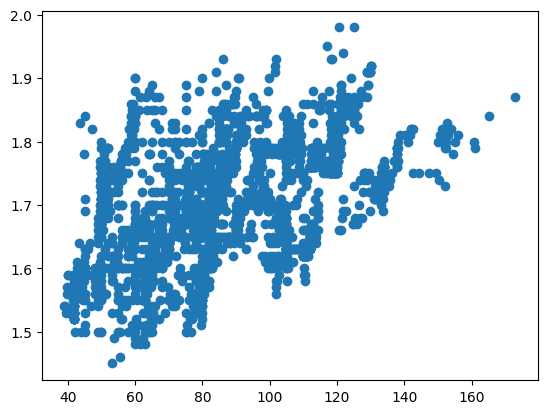

In [337]:
x =df["Weight"]
y= df["Height"]

plt.scatter(x, y)
plt.show()

In [338]:
df.columns

Index(['Age', 'Gender', 'Height', 'Weight', 'CALC', 'FAVC', 'FCVC', 'NCP',
       'SCC', 'SMOKE', 'CH2O', 'family_history_with_overweight', 'FAF', 'TUE',
       'CAEC', 'MTRANS', 'NObeyesdad', 'BMI'],
      dtype='object')

In [339]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier


X = df.drop(['NObeyesdad'], axis=1)
y = df['NObeyesdad']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)


RandomForestClassifier()

In [340]:
# Making predictions on the test set
y_pred = model.predict(X_test)

# Evaluating the model's performance
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)

Accuracy: 0.9880382775119617
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.97      0.97        59
           1       0.97      0.98      0.98        61
           2       1.00      0.98      0.99        55
           3       0.98      1.00      0.99        49
           4       1.00      0.99      0.99        70
           5       0.98      1.00      0.99        64
           6       1.00      1.00      1.00        60

    accuracy                           0.99       418
   macro avg       0.99      0.99      0.99       418
weighted avg       0.99      0.99      0.99       418



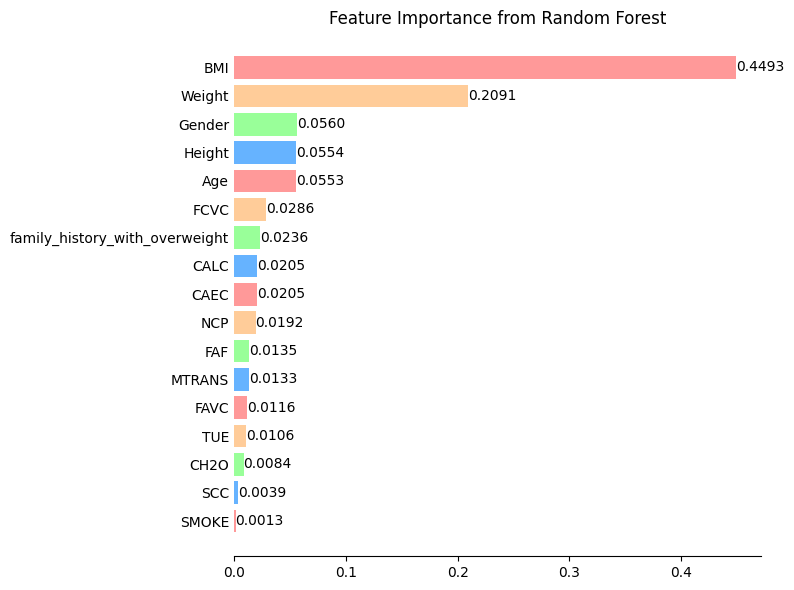

In [341]:
# Extract feature importances
importances = model.feature_importances_
features = X.columns

# Create a DataFrame for feature importances
importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
importance_df = importance_df.sort_values(by='Importance', ascending=True)

# Create a color mapping for the bars
colors = ['#ff9999', '#66b3ff', '#99ff99', '#ffcc99']
color_mapping = {label: colors[i % len(colors)] for i, label in enumerate(importance_df['Feature'])}

# Create a figure and axes for the bar chart
fig, ax = plt.subplots(figsize=(8, 6))

# Create a horizontal bar chart
bars = ax.barh(importance_df['Feature'], importance_df['Importance'],
               color=[color_mapping[label] for label in importance_df['Feature']], edgecolor='none')

# Add counts on the bars
for bar in bars:
    ax.text(bar.get_width(), bar.get_y() + bar.get_height() / 2,
            f"{bar.get_width():.4f}", va='center', ha='left', fontsize=10)

# Hide spines and ticks
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.tick_params(axis='y', which='both', length=0)

# Set the y-axis labels
ax.set_yticks(importance_df['Feature'])  # Set the y-tick positions
ax.set_yticklabels(importance_df['Feature'], fontsize=10)  # Set the y-tick labels

# Set the title for the plot
ax.set_title('Feature Importance from Random Forest', fontsize=12)

# Show the plot
plt.tight_layout()  # Adjust the layout
plt.show()

In [342]:
df['NObeyesdad'].unique()

array([1, 2, 3, 4, 0, 5, 6])

In [343]:
# df["CAEC"].value_counts()

df[df["NObeyesdad"] == 0]["CAEC"].value_counts()

,count
CAEC,
1,145
2,117
0,3
3,2


In [344]:
# data from https://allisonhorst.github.io/palmerpenguins/



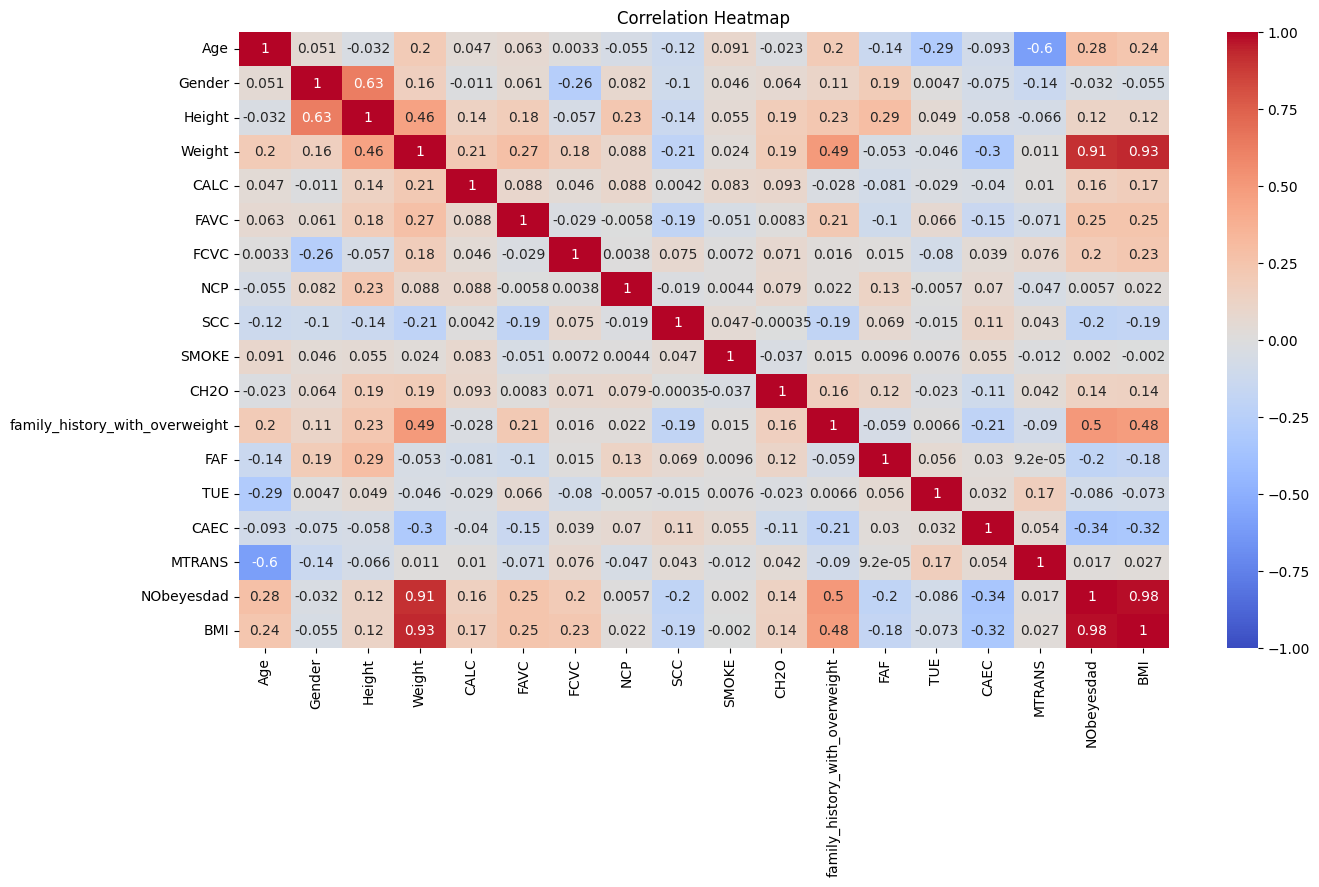

In [345]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame
correlation_matrix = df.corr()

# Set the figure size
plt.figure(figsize=(15, 8))

# Generate the heatmap with 'annot=True' to show the correlation values
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)

# Set title
plt.title('Correlation Heatmap')

# Show the plot
plt.show()


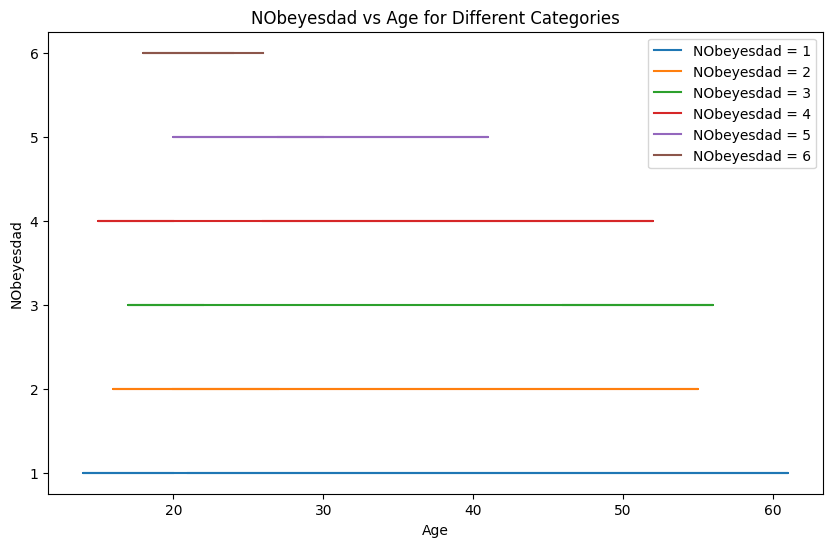

In [346]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame creation (replace this with your actual DataFrame)
# df = pd.read_csv('your_data.csv')

# Define your x and y values for different NObeyesdad categories
x1 = df[df["NObeyesdad"] == 1]["Age"]
y1 = df[df["NObeyesdad"] == 1]["NObeyesdad"]

x2 = df[df["NObeyesdad"] == 2]["Age"]
y2 = df[df["NObeyesdad"] == 2]["NObeyesdad"]

x3 = df[df["NObeyesdad"] == 3]["Age"]
y3 = df[df["NObeyesdad"] == 3]["NObeyesdad"]

x4 = df[df["NObeyesdad"] == 4]["Age"]
y4 = df[df["NObeyesdad"] == 4]["NObeyesdad"]

x5 = df[df["NObeyesdad"] == 5]["Age"]
y5 = df[df["NObeyesdad"] == 5]["NObeyesdad"]

x6 = df[df["NObeyesdad"] == 6]["Age"]
y6 = df[df["NObeyesdad"] == 6]["NObeyesdad"]

# Set the figure size
plt.figure(figsize=(10, 6))

# Plot all the lines
plt.plot(x1, y1, label='NObeyesdad = 1')  # Optional marker
plt.plot(x2, y2, label='NObeyesdad = 2')  # Optional marker
plt.plot(x3, y3, label='NObeyesdad = 3')  # Optional marker
plt.plot(x4, y4, label='NObeyesdad = 4')  # Optional marker
plt.plot(x5, y5, label='NObeyesdad = 5')  # Optional marker
plt.plot(x6, y6, label='NObeyesdad = 6')  # Optional marker

# Add labels and title
plt.xlabel('Age')
plt.ylabel('NObeyesdad')
plt.title('NObeyesdad vs Age for Different Categories')

# Add a legend to distinguish the lines
plt.legend()

# Show the plot
plt.show()
